# Challenge_TelecomX-BR_Parte-2

Autor: Paulo M. P. Patricio

# Preparação dos Dados

## 📌 Extração do Arquivo Tratado

In [ ]:
# ============================
# 1. Carregamento de Bibliotecas
# ============================

# Importando a biblioteca pandas, usada para manipulação de dados e estruturas de dados como DataFrames
import pandas as pd

# Importando a biblioteca numpy, usada para operações numéricas e manipulação de arrays multidimensionais
import numpy as np

# Importando a biblioteca seaborn, utilizada para visualização de dados e gráficos estatísticos avançados
import seaborn as sns

# Importando a biblioteca matplotlib.pyplot, usada para criação de gráficos básicos e customizáveis
import matplotlib.pyplot as plt


In [ ]:
# ============================
# 2. Carregamento dos Dados Tratados
# ============================

# Leitura do arquivo CSV com os dados tratados previamente na Etapa 1
df = pd.read_csv('/content/dados_telecomx_transformados.csv')
print(f"Shape: {df.shape}")  # Exibe quantidade de linhas e colunas
df.head()  # Visualização inicial do DataFrame

Shape: (7043, 22)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas.Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [ ]:
# Exibindo informações gerais sobre o DataFrame, como o número de entradas, tipos de dados de cada coluna e a presença de valores nulos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [ ]:
# Verificar se o DataFrame possui valores nulos
df.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


# Identificação das Variáveis

Antes de remover colunas irrelevantes, vamos idenificar nossas variáveis (colunas), identificar valores únicos e classificá-las.

In [ ]:
# Verificar valores únicos por coluna
valores_unicos = {col: df[col].unique() for col in df.columns}

# Converter em DataFrame para visualização
valores_unicos_df = pd.DataFrame({
    "Coluna": list(valores_unicos.keys()),
    "Valores Únicos": [list(v) for v in valores_unicos.values()],
    "Quantidade de Valores Únicos": [len(v) for v in valores_unicos.values()]
})

# Exibir
valores_unicos_df

,Coluna,Valores Únicos,Quantidade de Valores Únicos
0,customerID,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...",7043
1,Churn,"[No, Yes]",2
2,gender,"[Female, Male]",2
3,SeniorCitizen,"[0, 1]",2
4,Partner,"[Yes, No]",2
5,Dependents,"[Yes, No]",2
6,tenure,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34...",73
7,PhoneService,"[Yes, No]",2
8,MultipleLines,"[No, Yes, No phone service]",3
9,InternetService,"[DSL, Fiber optic, No]",3


## ✅ Classificação das Variáveis

| Coluna             | Tipo                   | Justificativa                                         |
| ------------------ | ---------------------- | ----------------------------------------------------- |
| `customerID`       | Categórica nominal     | Identificador único; não tem significado preditivo.   |
| `Churn`            | Categórica nominal     | Representa classes (sim/não); sem ordem.              |
| `gender`           | Categórica nominal     | Masculino/Feminino; não há hierarquia.                |
| `SeniorCitizen`    | Numérica discreta      | Binária (0/1), representa condição de idade ≥65 anos. |
| `Partner`          | Categórica nominal     | Sim/Não; presença de parceiro.                        |
| `Dependents`       | Categórica nominal     | Sim/Não; dependentes.                                 |
| `tenure`           | Numérica discreta      | Meses com a empresa; contável.                        |
| `PhoneService`     | Categórica nominal     | Sim/Não.                                              |
| `MultipleLines`    | Categórica nominal     | Sim/Não/sem serviço telefônico. (Possui grande <br> dependencia com a variável PhoneService)                       |
| `InternetService`  | Categórica nominal     | Tipos de serviço (DSL, Fibra, Sem internet).                   |
| `OnlineSecurity`   | Categórica nominal     | Sim/Não/Sem internet. (Possui grande dependencia <br> com a variável InternetService)                                |
| `OnlineBackup`     | Categórica nominal     | Sim/Não/Sem internet. (Possui grande dependencia <br> com a variável InternetService)                                 |
| `DeviceProtection` | Categórica nominal     | Sim/Não/Sem internet. (Possui grande dependencia <br> com a variável InternetService)                                 |
| `TechSupport`      | Categórica nominal     | Sim/Não/Sem internet. (Possui grande dependencia <br> com a variável InternetService)                                |
| `StreamingTV`      | Categórica nominal     | Sim/Não/Sem internet. (Possui grande dependencia <br> com a variável InternetService)                                 |
| `StreamingMovies`  | Categórica nominal     | Sim/Não/Sem internet. (Possui grande dependencia <br> com a variável InternetService)                                 |
| `Contract`         | Categórica **ordinal** | Ordem: mês a mês < 1 ano < 2 anos.                    |
| `PaperlessBilling` | Categórica nominal     | Sim/Não.                                              |
| `PaymentMethod`    | Categórica nominal     | Meios de pagamento sem ordem (cheque, cartão etc.).   |
| `Charges.Monthly`  | Numérica contínua      | Valor decimal contínuo.                               |
| `Charges.Total`    | Numérica contínua      | Acumulado de cobrança; valores decimais.              |
| `Contas.Diarias`   | Numérica contínua      | Gasto diário estimado; decimal contínuo.              |


⚠️ Ao classificarmos as variáveis, percebemos uma grande dependencia entre si em dois grupos.

1. Dependência explícita entre variáveis:

 * Exemplo:

    Se InternetService = No, então automaticamente:

    * OnlineSecurity, OnlineBackup, StreamingTV, etc. = "No internet service".

 * Isso cria uma relação determinística → multicolinearidade forte após o encoding.

2. Variáveis condicionais:

 * MultipleLines depende de PhoneService.

 * Se PhoneService = No, então MultipleLines = No phone service.

Todas são variáveis categóricas nominais, e possuem valores fortemente relacionados entre si, o que pode induzir multicolinearidade após o uso de One-Hot Encoding, caso não seja feita uma codificação cuidadosa.

### ✅ Solução

Agrupar valores que representam semelhante ausência de serviço, mesmo com rótulos diferentes:

1. MultipleLines:
  * 'No phone service' → representa que não há serviço telefônico

  * 'No' → representa que há telefone, mas sem múltiplas linhas

  * Ambos indicam ausência de múltiplas linhas

Transformar 'No phone service' em 'No' é coerente.

2. Variáveis relacionadas à Internet:

  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' e 'StreamingMovies'

  * 'No internet service' → o cliente não tem internet

  * 'No' → o cliente tem internet, mas não usa o serviço

Ambos resultam no valor 0 após o encoding e dessa maneira não contribuem para o churn diretamente de forma diferenciada.

Agrupar 'No internet service' como 'No' simplifica, sem perder representatividade.



### 🧠 Vantagens

| Benefício                                          | Explicação                                                                  |
| -------------------------------------------------- | --------------------------------------------------------------------------- |
| Redução da dimensionalidade                      | Menos colunas geradas no `One-Hot Encoding`                                 |
| Prevenção de multicolinearidade                  | Evita variáveis que indicam a mesma informação <br> com rótulos diferentes       |
| Interpretação mais limpa                         | Modelos interpretáveis como regressão logística <br> ou árvore terão menos ruído |
| Alinhado com o conceito de “ausência de serviço” | Melhora a semântica dos dados                                               |


In [ ]:
# Substituindo 'No phone service' por 'No' em MultipleLines
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

# Lista de colunas dependentes da Internet
internet_features = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Substituindo 'No internet service' por 'No' nessas colunas
for col in internet_features:
    df[col] = df[col].replace({'No internet service': 'No'})


In [ ]:
variaveis_agrupadas = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for coluna in variaveis_agrupadas:
    print(f"Valores únicos na coluna '{coluna}':")
    print(df[coluna].unique())
    print()

Valores únicos na coluna 'MultipleLines':
['No' 'Yes']

Valores únicos na coluna 'OnlineSecurity':
['No' 'Yes']

Valores únicos na coluna 'OnlineBackup':
['Yes' 'No']

Valores únicos na coluna 'DeviceProtection':
['No' 'Yes']

Valores únicos na coluna 'TechSupport':
['Yes' 'No']

Valores únicos na coluna 'StreamingTV':
['Yes' 'No']

Valores únicos na coluna 'StreamingMovies':
['No' 'Yes']



# Excluir colunas irrelevantes

✅ Analisando individualmente as colunas identificamos a princípio, que a variável 'customerID' deve ser removida:
'customerID' é um identificador único e não possui valor preditivo.
Manter essa coluna pode induzir o modelo a padrões aleatórios e prejudicar
seu desempenho.

In [ ]:
# ============================
# 3. Excluir coluna irrelevante
# ============================

# Excluir a coluna 'customerID' do dataframe
df.drop(columns=['customerID'], inplace=True)

# Verificação da Proporção de Evasão (Churn)

In [ ]:
# ============================
# 4. Verificação da Proporção de Evasão
# ============================
# Verifica a distribuição da variável alvo (Churn)
proporcao_churn = df['Churn'].value_counts(normalize=True)
print("\nProporção de clientes:")
print(proporcao_churn)


Proporção de clientes:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


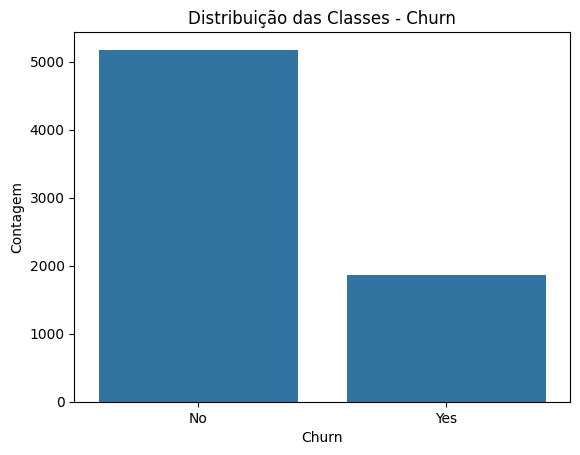

In [ ]:
# Visualiza graficamente o desequilíbrio entre classes
sns.countplot(x='Churn', data=df)
plt.title('Distribuição das Classes - Churn')
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.show()


## 🎯 Análise da Proporção de Evasão (Churn)

A variável Churn representa a evasão de clientes, sendo o alvo da modelagem preditiva. Verificar sua distribuição é um passo crucial antes de qualquer transformação dos dados, pois revela se há desequilíbrio entre as classes, o que pode afetar significativamente a performance dos modelos.

## 📊 Proporção observada

Ao calcular a frequência relativa de cada classe, obtemos a seguinte distribuição:

* Churn = No (Clientes que permaneceram): 73%

* nChurn = Yes (Clientes que evadiram): 27%

## Avaliação do balanceamento

Este cenário revela um moderado desbalanceamento entre as classes. Embora a classe majoritária represente a maior parte dos dados (clientes que não evadiram), ainda há uma quantidade razoável de casos de churn, o que permite treinar modelos preditivos. No entanto:

* Modelos que não lidam bem com desbalanceamento, como Regressão Logística e KNN, podem ser tendenciosos para a classe majoritária, prejudicando o recall da classe minoritária (Churn).

* Métricas como acurácia podem ser enganosas neste contexto, por isso será essencial avaliar também o Recall, Precisão e F1-score para a classe de churn.

🛠️ Implicações práticas

Dependendo do desempenho dos modelos, podemos considerar aplicar técnicas de balanceamento como:

* Oversampling: aumentar os exemplos da classe minoritária (ex: SMOTE);

* Undersampling: reduzir os exemplos da classe majoritária (ex: NearMiss);

* Ajuste de pesos nos modelos para penalizar mais os erros na classe minoritária.



# Encoding das Variáveis Categóricas

Muitos algoritmos de Machine Learning não conseguem lidar diretamente com variáveis categóricas, pois esperam entradas numéricas. Por isso, é essencial transformar essas variáveis em um formato numérico antes do treinamento dos modelos.

Entre as técnicas mais comuns estão:


| **Técnica**         | **Biblioteca**        | **Método**              | **Indicação**                                                                            |
|---------------------|-----------------------|-------------------------|------------------------------------------------------------------------------------------|
| Label Encoding      | `sklearn`             | `LabelEncoder()`        | Simples, útil quando há <br> **ordem implícita** nas <br> categorias.                    |
| Ordinal Encoding    | `sklearn`             | `OrdinalEncoder()`      | Para categorias com ordem (ex: <br> 'baixo', 'médio', 'alto').                           |
| One-Hot Encoding    | `sklearn`,<br> `pandas`   | `OneHotEncoder()`,<br> `get_dummies()` | Ideal para variáveis **nominais sem <br> ordem**. Evita atribuir <br> hierarquia falsa.    |



👉 Escolha feita: Usaremos o método '.get_dummies()', técnica One-Hot Encoding da biblioteca pandas.

## ✅ Justificativa para usar pd.get_dummies()

| Critério                                         | Justificativa                                                                                                                                                                        |
| ------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Simplicidade e agilidade**                     | `get_dummies()` é rápido, direto e fácil de aplicar em todo <br> o DataFrame com uma única linha de código. Ideal para <br> experimentações iniciais e projetos com categóricas bem <br> definidas. |
| **Integração com Pandas**                        | Como o `get_dummies()` já é do Pandas, você não <br> precisa criar pipelines adicionais, nem lidar com <br> etapas de transformação separadas.                                                 |
| **Bom para variáveis categóricas não-ordenadas** | Ele transforma automaticamente categorias nominais em <br> colunas binárias (0 ou 1), sem necessidade de especificar colunas.                                                             |
| **Evita problemas com treino/teste separados**   | Ao aplicar `get_dummies()` *antes* de dividir em treino e teste, <br> evita-se descompasso entre colunas criadas.                                                                         |
| **Customização simples**                         | Permite adicionar argumentos como `drop_first=True` para <br> evitar multicolinearidade em modelos lineares.                                                                              |


In [ ]:
# Criando uma cópia do datafreme df
df_tratado = df.copy()

# ✅ Aplicando o One-Hot Encoding com pd.get_dummies()
# - Convertemos todas as variáveis categóricas em variáveis dummies (binárias)
# - drop_first=True remove a primeira categoria para evitar multicolinearidade
df_encoded = pd.get_dummies(df_tratado, drop_first=True)

# ✅ Verificando as novas dimensões do DataFrame após encoding
print(f'Dimensões do DataFrame após One-Hot Encoding: {df_encoded.shape}')

# ✅ Visualizando as primeiras linhas do novo DataFrame
df_encoded.head()


Dimensões do DataFrame após One-Hot Encoding: (7043, 25)


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Contas.Diarias,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,2.19,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.9,542.40,2.00,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.46,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.27,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.80,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


## 🔍 Explicação do parâmetro drop_first=True

Esse argumento remove automaticamente a primeira categoria de cada coluna codificada. Isso:

* Evita redundância de informação (soma das dummies sempre dá 1).

* Reduz o risco de multicolinearidade em modelos lineares, como Regressão Logística.

🔄 Multicolinearidade

O ocorre quando **duas ou mais variáveis independentes estão altamente correlacionadas entre si** dentro de um modelo de regressão.

📌 Exemplo simples:

Imagine que temos uma variável categórica gender com duas categorias:

* Male
* Female

Se aplicarmos o One-Hot Encoding sem `drop_first=True`, teremos:

| gender\_Male | gender\_Female |
| ------------ | -------------- |
| 1            | 0              |
| 0            | 1              |

Nesse caso, **uma coluna é o oposto da outra**. Ou seja, se `gender_Male = 1`, então `gender_Female = 0`, e vice-versa.

Essas duas colunas estão **perfeitamente correlacionadas**, o que gera **multicolinearidade**.

⚠️ E por que isso é um problema?

* Em **modelos lineares** (como Regressão Logística), a multicolinearidade:

  * Dificulta a interpretação dos coeficientes.

  * Torna os estimadores instáveis.

  * Pode levar a **resultados distorcidos ou pouco confiáveis**.

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   Charges.Monthly                        7043 non-null   float64
 3   Charges.Total                          7043 non-null   float64
 4   Contas.Diarias                         7043 non-null   float64
 5   Churn_Yes                              7043 non-null   bool   
 6   gender_Male                            7043 non-null   bool   
 7   Partner_Yes                            7043 non-null   bool   
 8   Dependents_Yes                         7043 non-null   bool   
 9   PhoneService_Yes                       7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

## 👀 Observação:

O método `pd.get_dummies()` gera colunas com valores 0 e 1 por padrão, mas o tipo de dado resultante pode ser `bool` (**True/False**) quando:

* Todas as colunas originais codificadas tinham apenas dois valores distintos.

* Ou quando o Pandas consegue inferir que a coluna pode ser representada como booleana para otimização de memória.

Isso não compromete o uso nos modelos de **Machine Learning**, pois frameworks como `scikit-learn`, `xgboost` ou `lightgbm` aceitam `bool`, `int` ou `float` sem problema.

Vamos converter todas as variáveis dummies para o tipo int (0 e 1), por questão de padronização, clareza ou para compatibilidade com análises futuras.

In [ ]:
# 🎯 Seleciona todas as colunas do tipo booleano (True/False)
bool_cols = df_encoded.select_dtypes(include='bool').columns

# 🔄 Converte essas colunas booleanas para inteiros (0 e 1)
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# Criar o arquivo .csv para o dataframe 'df_encoded'
df_encoded.to_csv('df_encoded.csv', index=False)

# 👀 Visualiza as primeiras linhas do DataFrame após a conversão
df_encoded.head()


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Contas.Diarias,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,2.19,0,0,1,1,1,...,0,1,1,0,1,0,1,0,0,1
1,0,9,59.9,542.40,2.00,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,4,73.9,280.85,2.46,1,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
3,1,13,98.0,1237.85,3.27,1,1,1,0,1,...,1,0,1,1,0,0,1,0,1,0
4,1,3,83.9,267.40,2.80,1,0,1,0,1,...,0,1,1,0,0,0,1,0,0,1


O bloco acima garante que todas as variáveis dummies fiquem no formato numérico inteiro, o que ajuda na padronização e evita conflitos em algumas bibliotecas que não aceitam booleanos diretamente (como certas funções de visualização, estatísticas ou exportações CSV/Parquet com schema fixo).

# Análise de Correlação

In [ ]:
# Cálculo da matriz de correlação
corr_matrix = df_encoded.corr()

## Visualizar com um heatmap

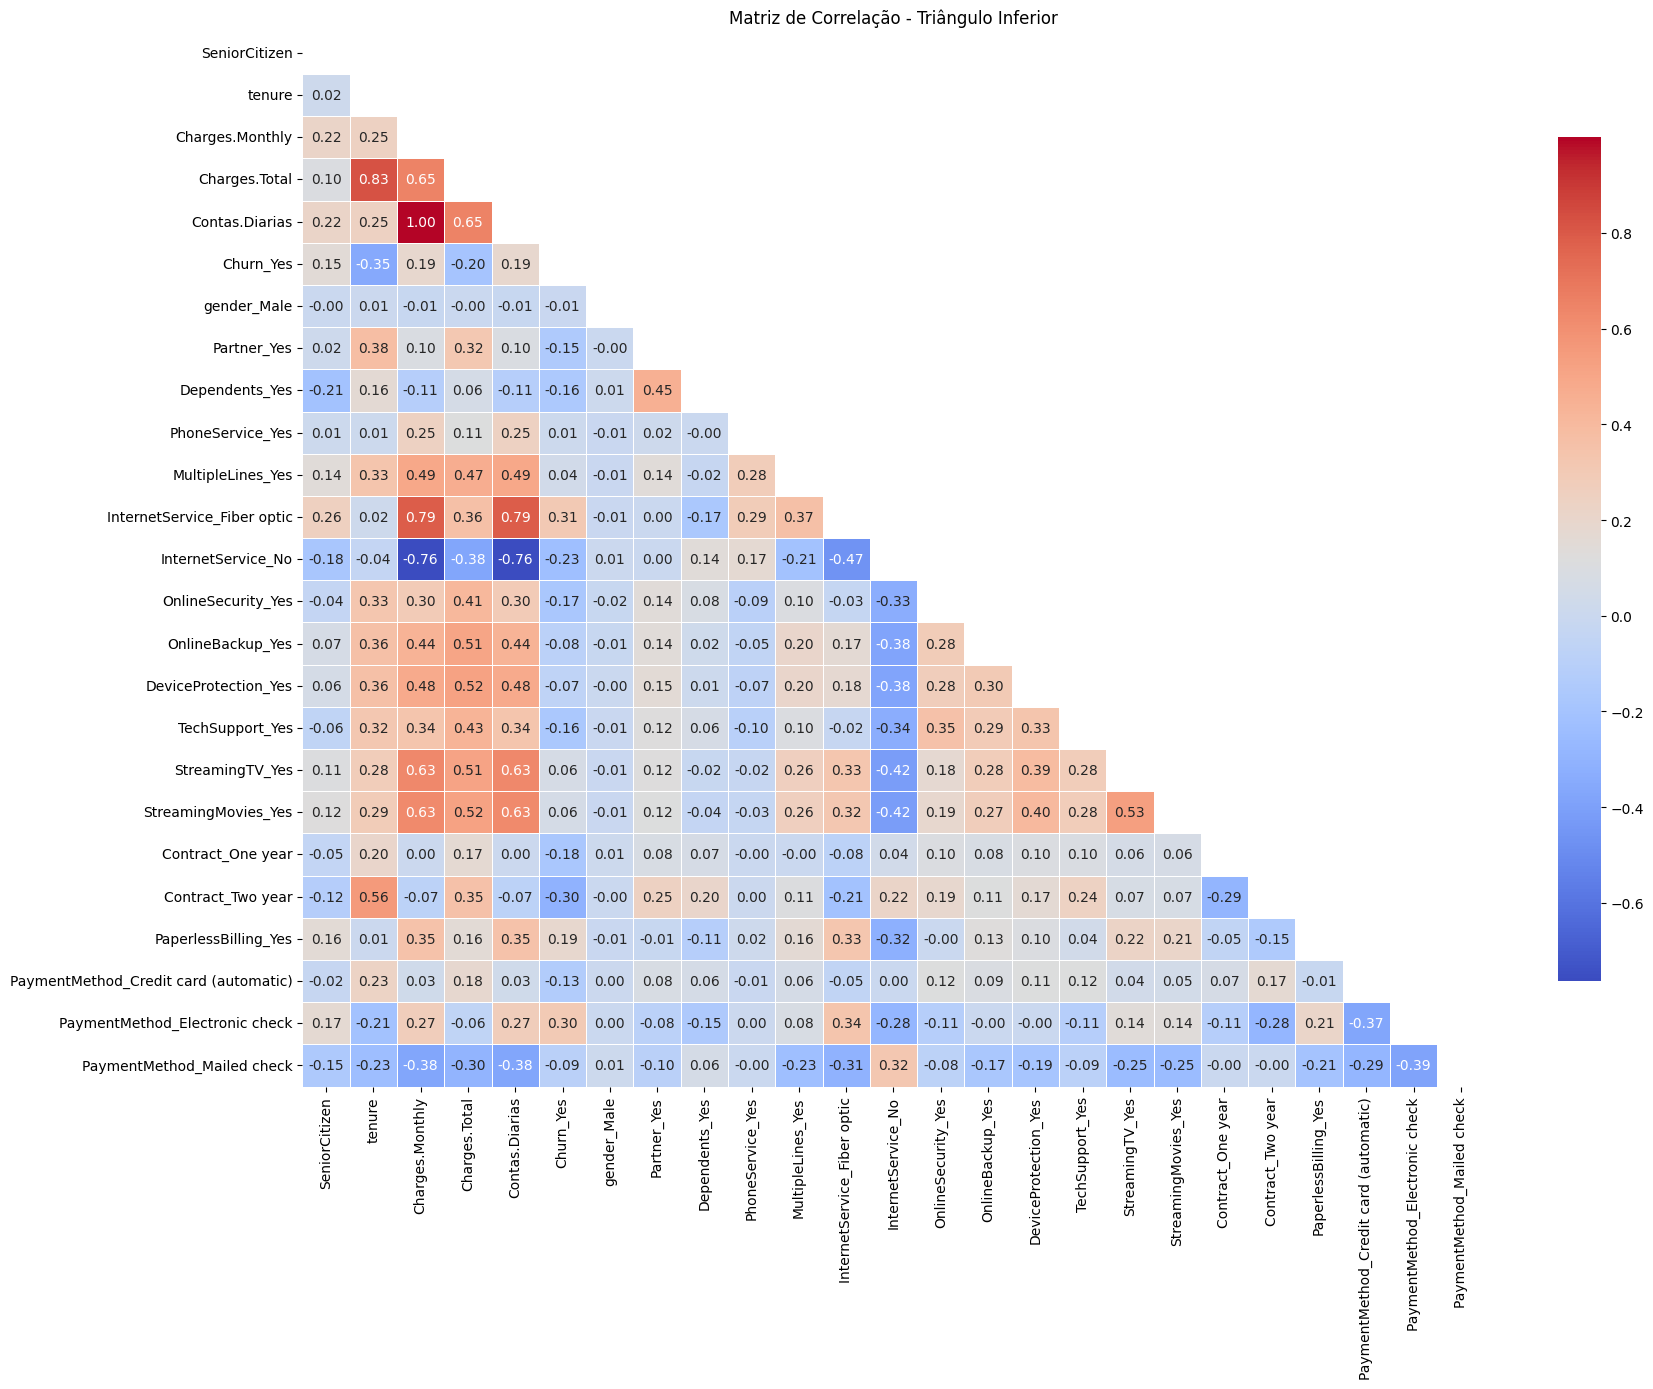

In [ ]:
# Gerando máscara para ocultar o triângulo superior
mascara = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Ajustando tamanho do gráfico
plt.figure(figsize=(18, 14))

# Heatmap com triângulo inferior
sns.heatmap(
    corr_matrix,
    mask=mascara,
    cmap='coolwarm',          # Pode ajustar o colormap aqui
    annot=True,               # Mostra os valores numéricos
    fmt=".2f",                # 2 casas decimais
    linewidths=0.5,           # Linhas de separação
    cbar_kws={"shrink": .8}   # Tamanho da barra de cores
)

plt.title("Matriz de Correlação - Triângulo Inferior")
plt.tight_layout()
plt.show()

## Ranking das variáveis ordenadas por correlação com Churn

In [ ]:
# Extraindo as correlações com a variável alvo 'Churn_Yes' e ordenando por magnitude
corr_churn = corr_matrix['Churn_Yes'].drop('Churn_Yes').sort_values(key=abs, ascending=False)

# Transformando em DataFrame para visualização
ranking_corr = corr_churn.reset_index()
ranking_corr.columns = ['Variável', 'Correlação com Churn']
ranking_corr.head(10)

,Variável,Correlação com Churn
0,tenure,-0.352229
1,InternetService_Fiber optic,0.308020
2,Contract_Two year,-0.302253
3,PaymentMethod_Electronic check,0.301919
4,InternetService_No,-0.227890
5,Charges.Total,-0.198324
6,Contas.Diarias,0.193412
7,Charges.Monthly,0.193356
8,PaperlessBilling_Yes,0.191825
9,Contract_One year,-0.177820


##  Criando uma nova correlação com variáveis selecionadas

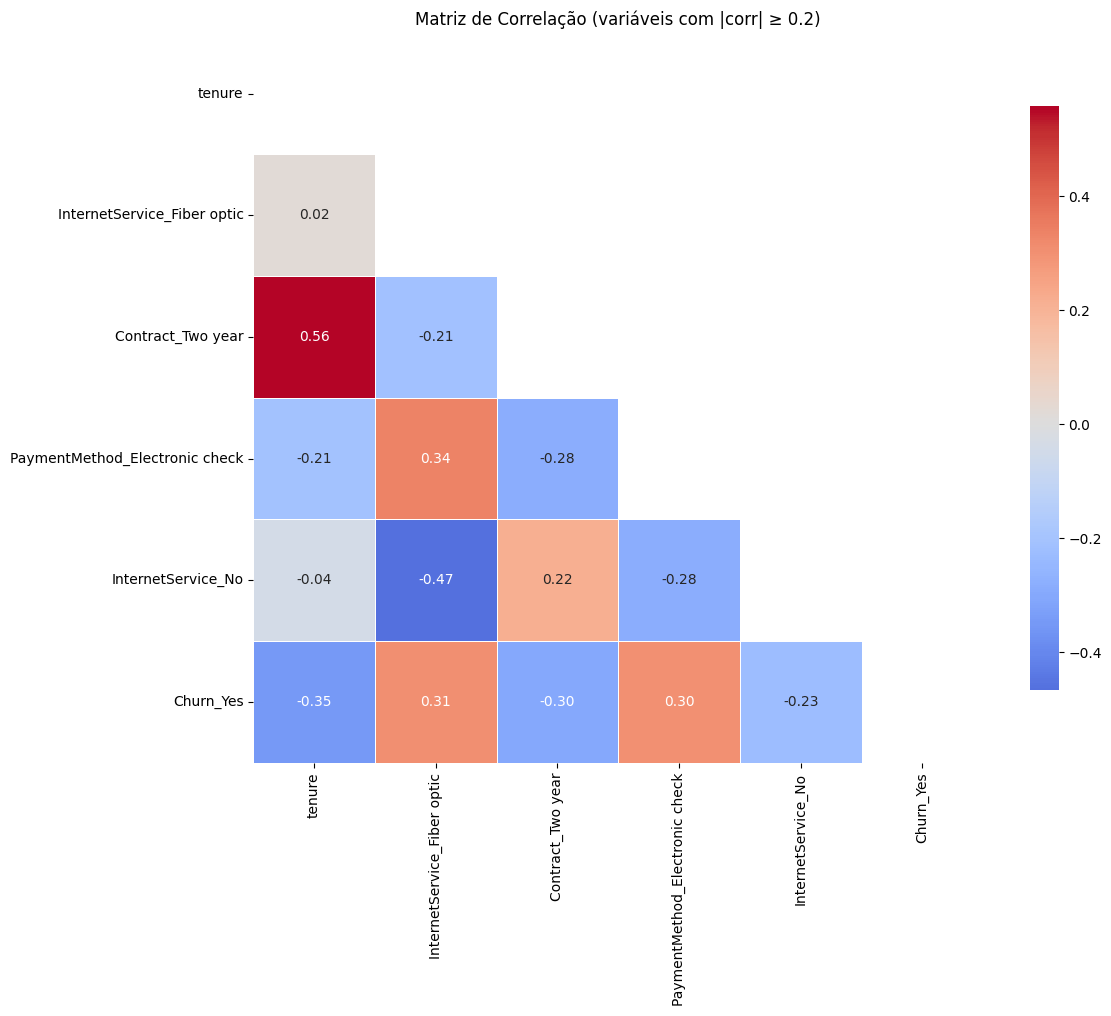

In [ ]:
# Definindo a variável alvo
target = 'Churn_Yes'

# Definindo limiar mínimo de correlação absoluta
limiar = 0.2

# Selecionando variáveis com correlação absoluta >= 0.2
vars_relevantes = corr_churn.index[abs(corr_churn) >= limiar].tolist()

# Garantindo que 'Churn_Yes' esteja na lista
if target not in vars_relevantes:
    vars_relevantes.append(target)

# Criando uma nova matriz de correlação com as variáveis relevantes
corr_vars_relevantes = df_encoded[vars_relevantes].corr()

# Criando máscara para esconder o triângulo superior
mascara = np.triu(np.ones_like(corr_vars_relevantes, dtype=bool))

# Plotando o heatmap triangular
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_vars_relevantes,
    mask=mascara,
    annot=True,
    fmt=".2f",
    center=0,
    square=True,
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)
plt.title("Matriz de Correlação (variáveis com |corr| ≥ 0.2)")
plt.tight_layout()
plt.show()

## Análise da correlação com as variáveis relevantes

Ranking de Correlação com Churn_Yes, listado da maior para a menor (em módulo), seguidas de uma interpretação estratégica.

| Variável | Correlação <br> com `Churn_Yes` | Interpretação <br> Estratégica |
| --- | --- | --- |
| `tenure` | **-0.35** | Clientes com maior tempo de permanência tendem <br> a não evadir. Forte preditor de lealdade. |
| `InternetService_Fiber optic` | **+0.31** | Clientes com fibra ótica têm maior chance de evasão, <br> possivelmente devido ao custo ou falhas percebidas. |
| `Contract_Two year` | **-0.30** | Contratos de 2 anos estão associados à **retenção**. <br> Pode indicar segurança ou fidelização. |
| `PaymentMethod_Electronic check` | **+0.30** | Pagamento com débito eletrônico tem forte associação <br> com churn — pode refletir menor engajamento ou perfil <br> financeiro mais instável. |
| `InternetService_No` | **-0.23** | Quem **não tem serviço de internet** tende a não evadir <br> (faz sentido: menos serviços contratados → menor <br> risco de frustração). |


# Analise de Multicolinearidade

## Análise com VIF (Variance Inflation Factor)

O VIF mede o quanto a variância de uma variável explicativa é inflada pela correlação com outras variáveis.
Valores de VIF altos indicam multicolinearidade.

### 📌 Interpretação dos valores:

| VIF  | Interpretação                       |
| ---- | ----------------------------------- |
| 1    | Sem multicolinearidade              |
| 1-5  | Aceitável, baixa multicolinearidade |
| 5-10 | Moderada, atenção necessária        |
| > 10 | Alta, deve ser tratada              |


## calculando o VIF:

In [ ]:
# 📚 Importando funções para cálculo do VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# 🎯 Removendo a variável alvo 'Churn_Yes' do conjunto de dados
# Isso é necessário porque o cálculo do VIF deve ser feito apenas com as variáveis explicativas (features)
X = df_encoded.drop(columns='Churn_Yes')

# ➕ Adicionando uma constante (intercepto) ao conjunto de variáveis
# Isso é necessário para o cálculo correto do VIF
X_const = add_constant(X)

# 🧮 Calculando o VIF para cada variável explicativa
# VIF alto indica que a variável tem alta correlação com outras variáveis do modelo (multicolinearidade)
vif = pd.DataFrame()
vif["Variável"] = X_const.columns
vif["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

# 📊 Ordenando as variáveis do maior para o menor VIF
# Isso facilita a identificação de possíveis problemas de multicolinearidade
vif.sort_values(by="VIF", ascending=False, inplace=True)

# 🖨️ Exibindo a tabela de VIFs
print(vif)


                                 Variável            VIF
3                         Charges.Monthly  115963.770858
5                          Contas.Diarias  115346.246855
0                                   const     628.676939
11            InternetService_Fiber optic     148.287984
12                     InternetService_No     104.229761
9                        PhoneService_Yes      34.863605
18                    StreamingMovies_Yes      24.111888
17                        StreamingTV_Yes      24.060593
4                           Charges.Total      10.795722
2                                  tenure       7.527306
10                      MultipleLines_Yes       7.275316
15                   DeviceProtection_Yes       6.922481
14                       OnlineBackup_Yes       6.783102
16                        TechSupport_Yes       6.469067
13                     OnlineSecurity_Yes       6.337004
20                      Contract_Two year       2.634074
23         PaymentMethod_Electr

###🔥 Variáveis com VIF extremamente alto (>> 10)

| Variável                      | VIF     | Interpretação                                                                                  |
| ----------------------------- | ------- | ---------------------------------------------------------------------------------------------- |
| `Charges.Monthly`             | 115.963 | 🚨 Muito colinear com outras variáveis <br> (como `Charges.Total` e possivelmente <br> `Contas.Diarias`) |
| `Contas.Diarias`              | 115.346 | 🚨 Fortemente correlacionada com <br> `Charges.Monthly`, possível relação <br> de cálculo                |
| `const`                       | 628.677 | Esperado — é o intercepto (pode ser <br> ignorado nesse contexto)                                   |
| `InternetService_Fiber optic` | 148.288 | 🚨 Muito correlacionada com `StreamingTV`, <br> `OnlineSecurity`, etc.                              |
| `InternetService_No`          | 104.220 | 🚨 Alta colinearidade com variáveis <br> dependentes da internet                                    |

✅ Essas variáveis devem ser avaliadas para possível remoção ou reagrupamento.

### ⚠️ Variáveis com VIF moderado (entre 5 e 10)

| Variável               | VIF   | Observação                                                        |
| ---------------------- | ----- | ----------------------------------------------------------------- |
| `tenure`               | 7.52  | Pode estar correlacionada com `Charges.Total` ou tipo de contrato |
| `MultipleLines_Yes`    | 7.27  | Possivelmente ligada à `PhoneService_Yes`                         |
| `DeviceProtection_Yes` | 6.92  | Correlacionada com `OnlineSecurity` e `TechSupport`               |
| `OnlineBackup_Yes`     | 6.78  | Mesmo motivo acima                                                |
| `OnlineSecurity_Yes`   | 6.34  | Idem                                                              |
| `TechSupport_Yes`      | 6.46  | Idem                                                              |
| `Charges.Total`        | 10.79 | Alta colinearidade com `Charges.Monthly` e `tenure`               |

⚠️ Essas variáveis merecem atenção, mas não precisam ser eliminadas de imediato.


### ✅ Variáveis com VIF baixo (OK)

Essas variáveis não apresentam preocupação com colinearidade:

* `Contract_Two year` (2.63)

* `PaymentMethod_Electronic check` (1.97)

* `PaymentMethod_Mailed check` (1.69)

* `Contract_One year` (1.62)

* `Partner_Yes`, `Dependents_Yes`, `PaperlessBilling_Yes`, `SeniorCitizen`, `gender_Male` (todos entre 1.0 e 1.5)

### 📌 Variáveis que serão removidas

🔴 1. Charges.Monthly – VIF ≈ 115.96

* Motivo: Fortemente colinear com Charges.Total e Contas.Diarias.

* Explicação: Valor mensal costuma ser base para o cálculo total (Charges.Total ≈ Charges.Monthly × tenure).

* Decisão: Remover Charges.Monthly e manter Charges.Total, que representa o histórico financeiro mais completo do cliente.

🔴 2. Contas.Diarias – VIF ≈ 115.35

* Motivo: Altamente colinear com Charges.Monthly.

* Explicação: Representa a frequência média de cobrança, que já está refletida nos valores de Charges.

* Decisão: Remover Contas.Diarias, pois Charges.Total e tenure já oferecem informações semelhantes.

🔴 3. InternetService_Fiber optic – VIF ≈ 148.29

* Motivo: Muito colinear com outras variáveis que dependem de ter internet (como StreamingTV, TechSupport, etc.).

* Explicação: O tipo de internet reflete fortemente na presença/ausência dos demais serviços.

* Decisão: Remover esta variável e manter as variáveis de uso de serviços, que são mais diretamente relacionadas ao comportamento do cliente.

🔴 4. InternetService_No – VIF ≈ 104.22

* Motivo: Mesma lógica do item anterior.

* Explicação: Clientes sem internet não contratam serviços como StreamingMovies, OnlineBackup, etc. Isso causa multicolinearidade estrutural.

* Decisão: Remover, pois o comportamento desses clientes será capturado por ausência de serviços.

🟡 5. PhoneService_Yes – VIF ≈ 34.80

* Motivo: Pode estar colinear com MultipleLines_Yes.

* Decisão: Opcional remover. Mas se formos manter MultipleLines_Yes, podemos remover PhoneService_Yes por trazer menos granularidade.

🟠 6. StreamingTV_Yes e StreamingMovies_Yes – VIF ≈ 24+

* Motivo: Altamente correlacionados entre si e com InternetService_Fiber optic.

* Decisão: Remover um deles. Sugestão: manter StreamingMovies_Yes e remover StreamingTV_Yes, por serem similares no comportamento.



## Excluindo colunas

In [ ]:
# Criar uma cópia do DataFrame original
df_encoded_v2 = df_encoded.copy()

In [ ]:
# Lista de variáveis a serem removidas com base na análise de VIF e justificativas técnicas
variaveis_para_remover = [
    'Charges.Monthly',
    'Contas.Diarias',
    'InternetService_Fiber optic',
    'InternetService_No',
    'StreamingTV_Yes',
    'PhoneService_Yes'
]

In [ ]:
# Removendo as variáveis da nova base
df_encoded_v2.drop(columns=variaveis_para_remover, inplace=True)

In [ ]:
# Gerando arquivo .csv do novo dataframe
df_encoded_v2.to_csv('df_encoded_v2.csv', index=False)

In [ ]:
# Verificando o novo dataframe
df_encoded_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   Charges.Total                          7043 non-null   float64
 3   Churn_Yes                              7043 non-null   int64  
 4   gender_Male                            7043 non-null   int64  
 5   Partner_Yes                            7043 non-null   int64  
 6   Dependents_Yes                         7043 non-null   int64  
 7   MultipleLines_Yes                      7043 non-null   int64  
 8   OnlineSecurity_Yes                     7043 non-null   int64  
 9   OnlineBackup_Yes                       7043 non-null   int64  
 10  DeviceProtection_Yes                   7043 non-null   int64  
 11  Tech

## Recalculando o VIF para o novo dataframe

In [ ]:
# Selecionando apenas as features para cálculo de VIF (sem a variável alvo)
X_v2 = df_encoded_v2.drop(columns='Churn_Yes')

In [ ]:
# Adicionando constante para o cálculo do VIF
X_const_v2 = add_constant(X_v2)

In [ ]:
# Recalculando o VIF
vif_v2 = pd.DataFrame()
vif_v2["Variável"] = X_const_v2.columns
vif_v2["VIF"] = [variance_inflation_factor(X_const_v2.values, i) for i in range(X_const_v2.shape[1])]

In [ ]:
# Ordenando os resultados
vif_v2.sort_values(by="VIF", ascending=False, inplace=True)
vif_v2.head(10)  # Exibir os 10 maiores VIFs após remoções


,Variável,VIF
0,const,12.796972
3,Charges.Total,7.006267
2,tenure,5.846841
14,Contract_Two year,2.404057
17,PaymentMethod_Electronic check,1.938688
18,PaymentMethod_Mailed check,1.802930
12,StreamingMovies_Yes,1.593100
16,PaymentMethod_Credit card (automatic),1.560013
13,Contract_One year,1.536869
10,DeviceProtection_Yes,1.476734


### 🧠 Análise final de multicolinearidade

* ✅ Todas as variáveis com exceção do const têm VIF < 10, o que é perfeitamente aceitável.

* ⚠️ As variáveis Charges.Total e tenure continuam com VIF relativamente alto (entre 5 e 10), mas ainda estão em zona segura para muitos modelos, especialmente porque são fortes preditores de churn.

* const (intercepto) com VIF alto é comum e irrelevante na maioria dos modelos — não precisa ser removido.

### 🚦 Conclusão:
A base `df_encoded_v2` agora está limpa de multicolinearidade severa e pronta para modelagem.

# Modelos preditivos

Serão criados 4 modelos, 2 linares e 2 não lineares.

## 🔷 Modelos Lineares (explicativos e interpretáveis):

1. Regressão Logística (LogisticRegression)

 * Modelo base e explicável.

 * Coeficientes podem ser interpretados diretamente (efeito de cada variável no churn).

 * Boa performance quando as variáveis têm relação linear com a probabilidade de churn.

2. Ridge Classifier (RidgeClassifier)

 * Variante da regressão logística com regularização L2.

 * Ajuda a controlar pequenas correlações residuais entre features.

 * Útil quando há muitas variáveis e queremos evitar overfitting.

## 🔶 Modelos Não Lineares (mais poderosos e automáticos):

1. Random Forest (RandomForestClassifier)

 * Modelo de ensemble baseado em várias árvores.

 * Captura interações não lineares entre variáveis.

 * Fornece importância de variáveis e é robusto a outliers e multicolinearidade residual.

2. XGBoost (XGBClassifier)

 * Variante de boosting que foca em erros anteriores.

 * Geralmente é o modelo mais competitivo em competições de churn.

 * Requer tunagem de hiperparâmetros para melhor desempenho, mas costuma performar muito bem com dados tabulares.


Esses 4 modelos oferecem um bom equilíbrio entre interpretabilidade (lineares) e performance preditiva (não lineares).

In [ ]:
# Criar uma cópia do dataframe 'df_encoded_v2'
df_modelagem = df_encoded_v2.copy()

# Criando modelo não linear Random Forest

In [ ]:
# Etapas: Aplicar SMOTE + Treinar e Avaliar Random Forest
# 📚 Importando bibliotecas necessárias
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [ ]:
# 🎯 Separando variável alvo e variáveis explicativas
X = df_modelagem.drop(columns='Churn_Yes')
y = df_modelagem['Churn_Yes']

In [ ]:
# 🔀 Dividindo em treino e teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Balanceamento

In [ ]:
# ⚖️ Aplicando SMOTE para balancear o conjunto de treino
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## Treinamento

In [ ]:
# 🌲 Treinando o modelo Random Forest com dados balanceados
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

## Previsões no conjunto teste

In [ ]:
# 🔍 Fazendo previsões no conjunto de teste
y_pred = modelo_rf.predict(X_test)

# Obtendo as probabilidades preditas para a classe 1 (Churn = Yes)
y_prob_rf = modelo_rf.predict_proba(X_test)[:, 1]


## Avaliação

In [ ]:
# 📊 Avaliando o desempenho do modelo
relatorio = classification_report(y_test, y_pred, output_dict=False)
matriz_confusao = confusion_matrix(y_test, y_pred)

# Exibindo os resultados
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("📋 Classification Report:\n")
print(relatorio)
print("\n🧩 Matriz de Confusão:\n")
print(matriz_confusao)

Random Forest
Acurácia: 0.7543776620918126
ROC AUC: 0.7960914098535384
📋 Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1552
           1       0.54      0.55      0.54       561

    accuracy                           0.75      2113
   macro avg       0.69      0.69      0.69      2113
weighted avg       0.76      0.75      0.76      2113


🧩 Matriz de Confusão:

[[1287  265]
 [ 254  307]]


### 🧠 Interpretação Estratégica

* Acurácia geral de 75%: bastante aceitável, considerando a base desbalanceada.

* Recall da classe 1 (churn): 0.55 → o modelo identificou 55% dos clientes que realmente evadiram.

 * Isso é importante, pois minimizar falsos negativos (clientes que evadem e o modelo não prevê) é crítico para churn.

* Precision da classe 1: 0.54 → há um número moderado de falsos positivos, ou seja, o modelo às vezes prevê churn onde não há.

 * Em estratégias preventivas, isso é tolerável, já que é melhor abordar um cliente que não sairia do que perder um que vai sair.

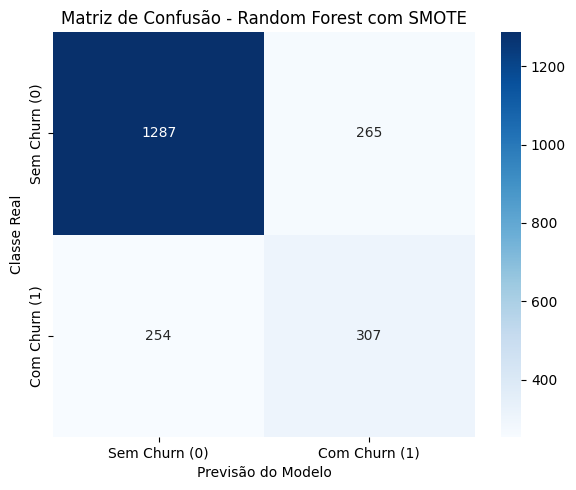

In [ ]:
# Criando uma figura para o heatmap
plt.figure(figsize=(6, 5))

# Criando o heatmap da matriz de confusão
sns.heatmap(
    matriz_confusao,
    annot=True,               # Mostrar os números dentro das células
    fmt='d',                  # Formato inteiro
    cmap='Blues',             # Paleta de cores
    xticklabels=['Sem Churn (0)', 'Com Churn (1)'],
    yticklabels=['Sem Churn (0)', 'Com Churn (1)']
)

plt.title('Matriz de Confusão - Random Forest com SMOTE')
plt.xlabel('Previsão do Modelo')
plt.ylabel('Classe Real')
plt.tight_layout()
plt.show()

### 🧩 Interpretação Visual:

* Canto superior esquerdo (1287): acertos da classe "Sem Churn"

* Canto inferior direito (307): acertos da classe "Com Churn"

* Canto superior direito (265): falsos positivos – previu churn onde não houve

* Canto inferior esquerdo (254): falsos negativos – não previu churn onde houve

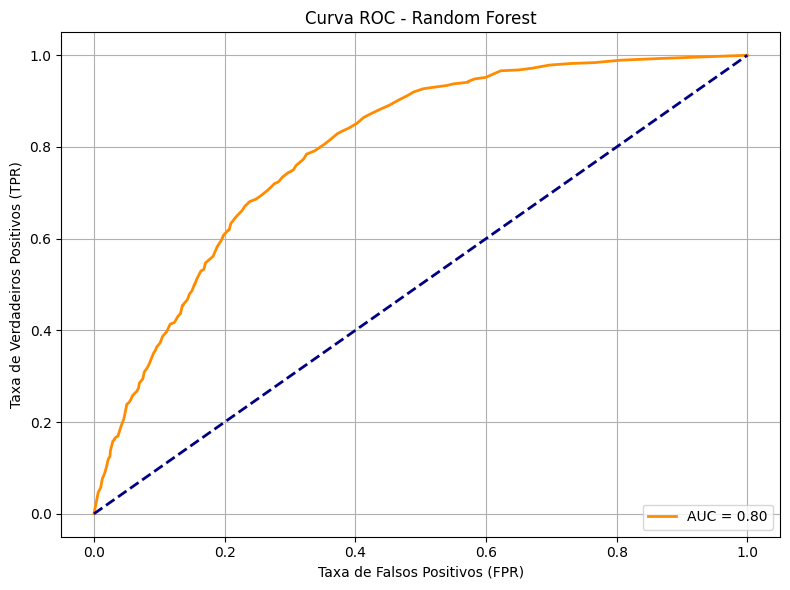

In [ ]:
# Calculando os valores da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # linha aleatória
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### 🧠 Interpretação:

* A curva representa o desempenho do modelo para diferentes limiares de decisão.

* Quanto mais a curva se aproxima do canto superior esquerdo, melhor o modelo.

* A AUC (Área Sob a Curva) foi de aproximadamente 0.80, o que indica bom poder discriminativo.



# 📊 Análise de importância das variáveis no modelo Random Forest

### Benefícios:
* Entendimento dos fatores de risco de churn

* Comunicação com o time de negócios

* Redução de dimensionalidade, se necessário

In [ ]:
# Extraindo os nomes das features e suas respectivas importâncias
importancias = modelo_rf.feature_importances_
nomes_variaveis = X.columns

In [ ]:
# Criando um DataFrame para facilitar a visualização
df_importancias = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

/tmp/ipython-input-3929416145.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


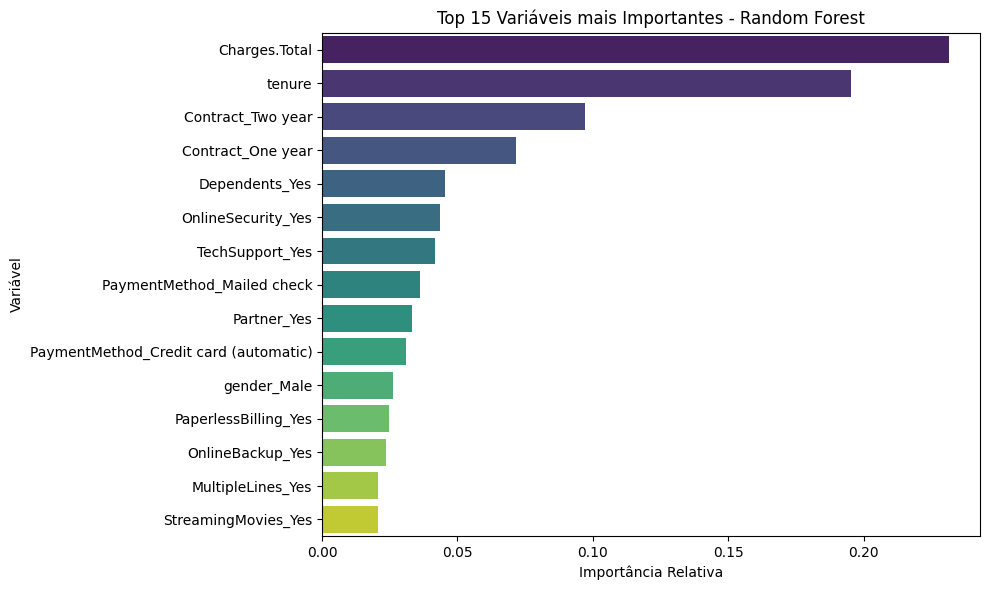

In [ ]:
# 🔝 Exibindo as 15 variáveis mais importantes
top_n = 15
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_importancias.head(top_n),
    x='Importância',
    y='Variável',
    palette='viridis'
)
plt.title(f'Top {top_n} Variáveis mais Importantes - Random Forest')
plt.xlabel('Importância Relativa')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

### 🧠 Interpretação:

* As variáveis no topo, como tenure, Contract_Two year, Charges.Total e InternetService_DSL, são as que mais influenciam na previsão de churn.

* Variáveis com importância próxima de zero podem ser consideradas irrelevantes neste modelo.

Essa análise é essencial para gerar insights estratégicos, como por exemplo:

"Clientes com pouco tempo de casa e contrato mensal têm maior chance de evasão."

# Criando o modelo não linear XGBoost

In [ ]:
# 📚 Importando o modelo XGBoost
from xgboost import XGBClassifier


## Treinamento

In [ ]:
ratio = (y_train == 0).sum() / (y_train == 1).sum()

In [ ]:
# 🎯 Treinando o modelo XGBoost com ajuste para desbalanceamento
modelo_xgb = XGBClassifier(
    eval_metric='logloss',        # métrica padrão
    scale_pos_weight=ratio,        # compensação do desbalanceamento
    random_state=42
)

In [ ]:
# ⏱️ Treinando com os dados originais (sem SMOTE, pois usamos scale_pos_weight)
modelo_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## Previsões

In [ ]:
# 🔍 Fazendo previsões no conjunto de teste
y_pred_xgb = modelo_xgb.predict(X_test)

# Obtendo as probabilidades preditas para a classe 1 (Churn = Yes)
y_prob_xgb = modelo_xgb.predict_proba(X_test)[:, 1]

# Avaliação

In [ ]:
# 📊 Avaliando o desempenho
relatorio_xgb = classification_report(y_test, y_pred_xgb, output_dict=False)
matriz_confusao_xgb = confusion_matrix(y_test, y_pred_xgb)

In [ ]:
# Exibindo resultados
print("XGBoost")
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))
print("📋 Classification Report - XGBoost:\n")
print(relatorio_xgb)
print("\n🧩 Matriz de Confusão - XGBoost:\n")
print(matriz_confusao_xgb)

XGBoost
Acurácia: 0.7458589682915286
ROC AUC: 0.8102477167061763
📋 Classification Report - XGBoost:

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1552
           1       0.52      0.66      0.58       561

    accuracy                           0.75      2113
   macro avg       0.69      0.72      0.70      2113
weighted avg       0.77      0.75      0.75      2113


🧩 Matriz de Confusão - XGBoost:

[[1203  349]
 [ 188  373]]


### 🧠 Interpretação Estratégica – XGBoost

* ✅ Acurácia geral de 75%
Um desempenho robusto, especialmente considerando que a base está desbalanceada (com mais clientes que não evadem). Isso indica que o modelo está conseguindo aprender o padrão geral de comportamento.

* 📈 ROC AUC = 0.81
Excelente capacidade discriminativa. Isso significa que o modelo tem 81% de chance de distinguir corretamente um cliente que vai evadir de um que vai permanecer.

* 🔁 Recall da classe 1 (Churn) = 0.66
O modelo conseguiu identificar 66% dos clientes que realmente evadiram, ou seja, reduziu falsos negativos — isso é fundamental para ações preventivas, pois evitar perder clientes reais é a prioridade em churn.

* 🎯 Precision da classe 1 (Churn) = 0.52
Cerca de 52% dos clientes classificados como churn de fato evadem. Isso significa que há falsos positivos, mas em cenários de churn, essa troca é aceitável:

 * Melhor abordar um cliente que talvez não sairia (falso positivo)

 * Do que deixar de intervir em quem com certeza sairia (falso negativo)



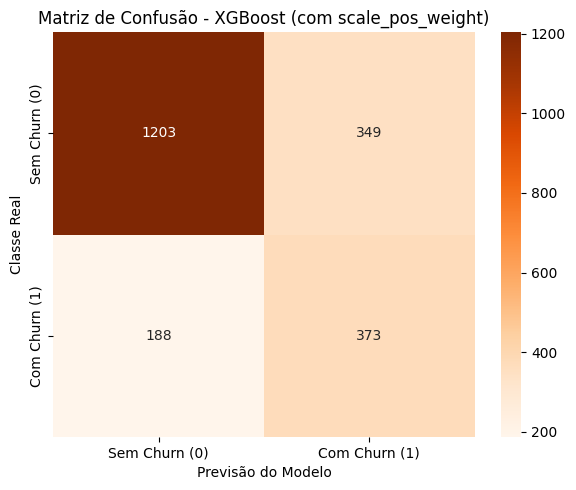

In [ ]:
# 📊 Visualização gráfica da matriz de confusão do modelo XGBoost
plt.figure(figsize=(6, 5))

# Criando o heatmap com a matriz de confusão do XGBoost
sns.heatmap(
    matriz_confusao_xgb,
    annot=True,               # Mostrar os valores dentro das células
    fmt='d',                  # Formato numérico inteiro
    cmap='Oranges',           # Paleta de cores diferente para destacar o modelo
    xticklabels=['Sem Churn (0)', 'Com Churn (1)'],
    yticklabels=['Sem Churn (0)', 'Com Churn (1)']
)

plt.title('Matriz de Confusão - XGBoost (com scale_pos_weight)')
plt.xlabel('Previsão do Modelo')
plt.ylabel('Classe Real')
plt.tight_layout()
plt.show()


### 🧩 Interpretação Visual:

* Canto superior esquerdo (1203): acertos da classe "Sem Churn"

* Canto inferior direito (373): acertos da classe "Com Churn"

* Canto superior direito (349): falsos positivos – previu churn onde não houve

* Canto inferior esquerdo (188): falsos negativos – não previu churn onde houve

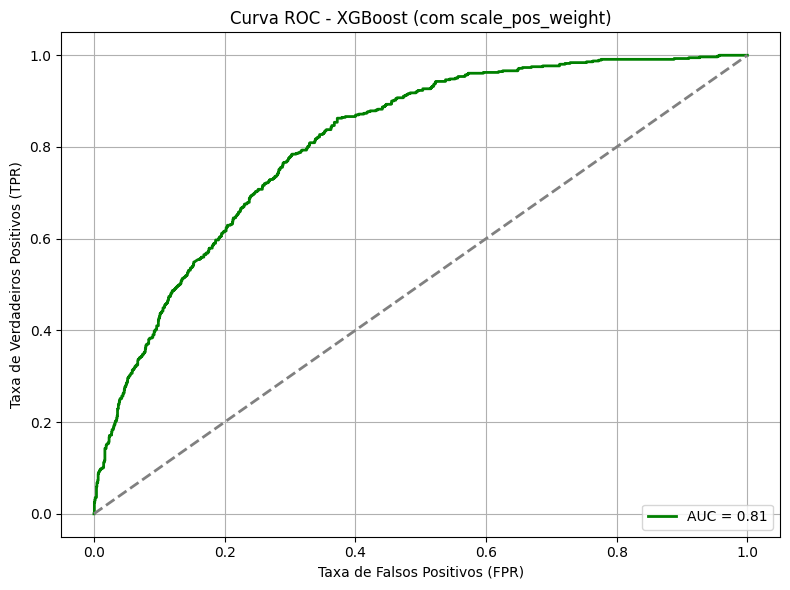

In [ ]:
# Calculando os valores da curva ROC para o XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC = {roc_auc_xgb:.2f}', color='green', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # linha aleatória
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - XGBoost (com scale_pos_weight)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


🧠 Interpretação estratégica:

* O modelo XGBoost tem 81% de chance de distinguir corretamente um cliente que vai evadir de um que vai permanecer, ao comparar um par aleatório.

* A curva sobe rápido no início (entre FPR 0 e 0.2), o que significa que mesmo com baixa taxa de erro, já conseguimos capturar muitos churns verdadeiros.

* Isso é excelente para estratégias preventivas, pois você consegue agir cedo com boa precisão.

📊 Análise de importância das variáveis no modelo XGBoost

In [ ]:
# Extraindo as importâncias diretamente do modelo treinado
importancias_xgb = modelo_xgb.feature_importances_
nomes_variaveis_xgb = X.columns


In [ ]:
# Criando um DataFrame com os resultados
df_importancias_xgb = pd.DataFrame({
    'Variável': nomes_variaveis_xgb,
    'Importância': importancias_xgb
}).sort_values(by='Importância', ascending=False)

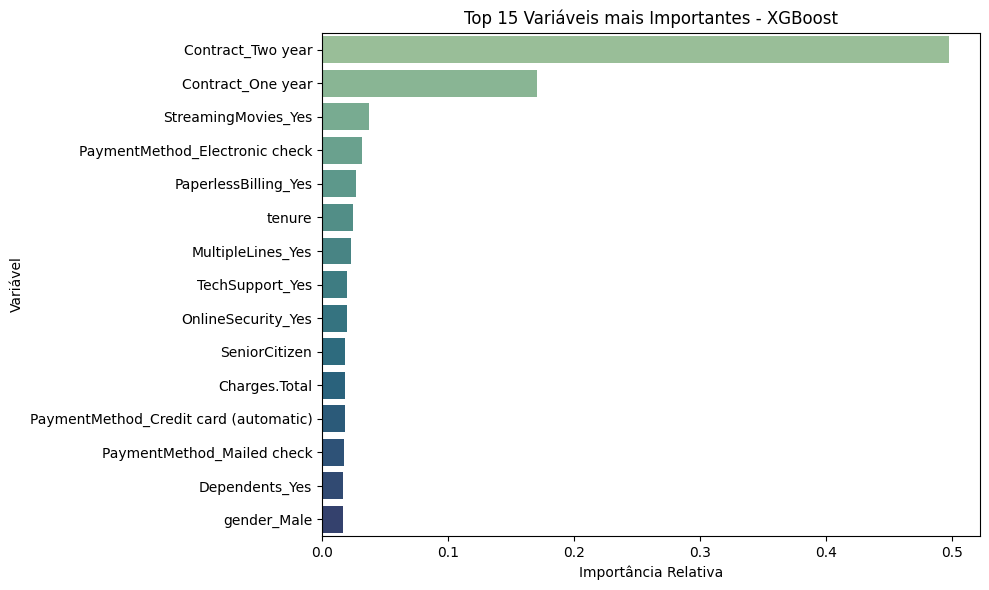

In [ ]:
# 🔝 Exibindo as 15 variáveis mais importantes
top_n = 15
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_importancias_xgb.head(top_n),
    x='Importância',
    y='Variável',
    hue='Variável',
    palette='crest',
    legend=False
)

plt.title(f'Top {top_n} Variáveis mais Importantes - XGBoost')
plt.xlabel('Importância Relativa')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

### 📌 Conclusão:

* O tipo de contrato é o fator mais determinante segundo o XGBoost.

* Outros comportamentos como uso de streaming, método de pagamento e faturamento digital também impactam fortemente.

* Essa análise pode direcionar ações de retenção personalizadas, por exemplo:

    “Clientes com contrato mensal e débito eletrônico que não usam streaming devem ser prioridade nas campanhas preventivas.”

# Criando o Modelo Linear de Regressão Logística

In [ ]:
# ============================================
# 1) Setup: imports, seed e carregamento
# ============================================

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, PrecisionRecallDisplay
)
from sklearn.linear_model import LogisticRegression

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# --- Carregando o dataset pronto para modelagem (já com get_dummies e VIF aplicado) ---
# Ajuste o caminho se necessário:
df = pd.read_csv('/content/df_encoded_v2.csv')

# Conferindo o shape e as primeiras colunas
print(df.shape)
df.head()


(7043, 19)


,SeniorCitizen,tenure,Charges.Total,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,593.30,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1
1,0,9,542.40,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,0,4,280.85,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
3,1,13,1237.85,1,1,1,0,0,0,1,1,0,1,0,0,1,0,1,0
4,1,3,267.40,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1


## Definição de X e y + split estratificado

In [ ]:
# ============================================
# 2) X / y e divisão treino-teste estratificada
# ============================================

# Variável alvo
target_col = 'Churn_Yes'

y = df[target_col].astype(int)
X = df.drop(columns=[target_col])

# Split estratificado para manter a proporção de churn em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE, stratify=y
)

print('Distribuição treino:', y_train.value_counts(normalize=True).round(3).to_dict())
print('Distribuição teste :', y_test.value_counts(normalize=True).round(3).to_dict())


Distribuição treino: {0: 0.735, 1: 0.265}
Distribuição teste : {0: 0.735, 1: 0.265}


## Pipeline com StandardScaler + LogisticRegression (class_weight='balanced')

In [ ]:
# ============================================================
# 3A) Pipeline: StandardScaler -> LogisticRegression balanceada
# ============================================================
from scipy import sparse
scaler = StandardScaler(with_mean=False) if sparse.issparse(X_train) else StandardScaler()

pipe_lr_bal = Pipeline(steps=[
    ('scaler', scaler),
    ('lr', LogisticRegression(
        penalty='l2',        # regularização L2 (padrão e estável)
        C=1.0,               # força da regularização (quanto menor, mais forte)
        solver='liblinear',  # robusto para binário e coeficientes interpretáveis
        class_weight='balanced',
        random_state=RANDOM_STATE,
        max_iter=1000
    ))
])

pipe_lr_bal.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42, solver='liblinear'))])

## Avaliação no conjunto de teste

In [ ]:
# ============================================
# 4) Avaliação: accuracy, precision, recall, F1, ROC AUC e matriz de confusão
# ============================================

def avaliar_modelo(nome, modelo, X_tr, y_tr, X_te, y_te):
    y_pred = modelo.predict(X_te)
    # Probabilidade da classe positiva (necessária para ROC AUC)
    try:
        y_proba = modelo.predict_proba(X_te)[:, 1]
    except AttributeError:
        # Em classificadores que não possuem predict_proba, use decision_function
        y_scores = modelo.decision_function(X_te)
        # Escala pode ser convertida para pseudo-proba via min-max para AUC comparável (opcional)
        y_min, y_max = y_scores.min(), y_scores.max()
        y_proba = (y_scores - y_min) / (y_max - y_min + 1e-9)

    acc  = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, zero_division=0)
    rec  = recall_score(y_te, y_pred, zero_division=0)
    f1   = f1_score(y_te, y_pred, zero_division=0)
    auc  = roc_auc_score(y_te, y_proba)

    print(f'=== {nome} ===')
    print(f'Accuracy : {acc:0.4f}')
    print(f'Precision: {prec:0.4f}')
    print(f'Recall   : {rec:0.4f}')
    print(f'F1-Score : {f1:0.4f}')
    print(f'ROC AUC  : {auc:0.4f}')
    print('\nMatriz de Confusão:')
    print(confusion_matrix(y_te, y_pred))
    print('\nClassification Report:')
    print(classification_report(y_te, y_pred, digits=4))

avaliar_modelo('LR (class_weight=balanced)', pipe_lr_bal, X_train, y_train, X_test, y_test)
print('\n' + '='*60 + '\n')


=== LR (class_weight=balanced) ===
Accuracy : 0.7231
Precision: 0.4872
Recall   : 0.8164
F1-Score : 0.6103
ROC AUC  : 0.8280

Matriz de Confusão:
[[1070  482]
 [ 103  458]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9122    0.6894    0.7853      1552
           1     0.4872    0.8164    0.6103       561

    accuracy                         0.7231      2113
   macro avg     0.6997    0.7529    0.6978      2113
weighted avg     0.7994    0.7231    0.7388      2113





### 📌 Interpretação Estratégica – Modelo Linear: Regressão Logística

1. Visão Geral do Desempenho

  * Acurácia (72,31%): O modelo acerta aproximadamente 7 em cada 10 previsões.

    ⚠️ Como o objetivo é prever churn, a acurácia isolada não é a melhor métrica de decisão, devido ao desbalanceamento original das classes.

  * ROC AUC (0,8280): Boa capacidade de discriminar entre clientes que vão cancelar e os que vão permanecer.

  * Recall da Classe 1 (Clientes que churnam) – 81,64%: O modelo está capturando a maioria dos clientes que realmente vão cancelar, o que é estratégico para ações preventivas.

  * Precision da Classe 1 – 48,72%: Menos da metade dos clientes previstos como churn realmente cancelarão, indicando risco de ações de retenção em clientes que não sairiam.

  * F1-Score da Classe 1 (0,6103): Balanceia o recall alto com a precisão moderada, refletindo um bom ponto de partida, mas com margem para ajuste.



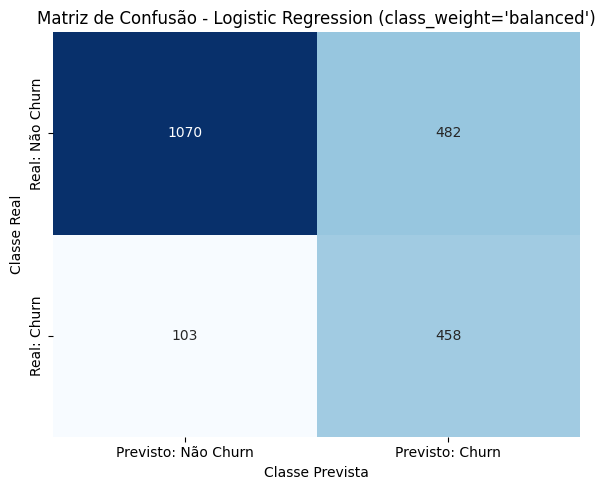

In [ ]:
# Valores obtidos diretamente da matriz de confusão da sua saída
matriz_confusao = confusion_matrix(y_test, pipe_lr_bal.predict(X_test))

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Previsto: Não Churn", "Previsto: Churn"],
            yticklabels=["Real: Não Churn", "Real: Churn"])

plt.title("Matriz de Confusão - Logistic Regression (class_weight='balanced')", fontsize=12)
plt.ylabel("Classe Real")
plt.xlabel("Classe Prevista")
plt.tight_layout()
plt.show()

### Análise da Matriz de Confusão

* Verdadeiros Positivos (458): Clientes previstos como churn que realmente cancelaram – representam o acerto estratégico.

* Falsos Negativos (103): Clientes que churnaram mas não foram identificados – risco direto de perda de receita por falta de ação.

* Falsos Positivos (482): Clientes previstos como churn, mas que ficariam – geram custo potencial de retenção desnecessário.

* Verdadeiros Negativos (1070): Clientes corretamente identificados como não churn.

<Figure size 700x500 with 0 Axes>

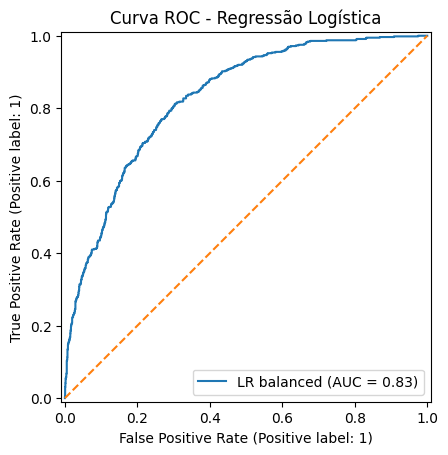

<Figure size 700x500 with 0 Axes>

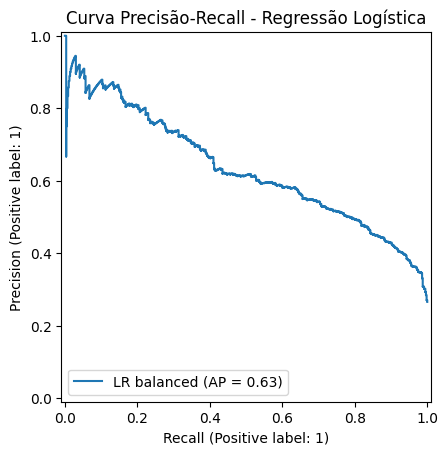

In [ ]:
# ============================================
# 5) Curvas ROC e Precisão-Recall
# ============================================

# --- ROC ---
plt.figure(figsize=(7,5))
RocCurveDisplay.from_estimator(pipe_lr_bal, X_test, y_test, name='LR balanced')
plt.plot([0,1], [0,1], linestyle='--')
plt.title('Curva ROC - Regressão Logística')
plt.show()

# --- Precisão-Recall ---
plt.figure(figsize=(7,5))
PrecisionRecallDisplay.from_estimator(pipe_lr_bal, X_test, y_test, name='LR balanced')
plt.title('Curva Precisão-Recall - Regressão Logística')
plt.show()


### 📈 1. Curva ROC

* AUC = 0,83 → O modelo tem boa capacidade discriminatória, conseguindo diferenciar clientes que churnam dos que não churnam com alto grau de confiança.

* Comportamento da curva:

  * A curva está bem acima da diagonal aleatória (linha tracejada), indicando que o modelo é muito melhor que um classificador aleatório.

  * Quanto mais próximo do canto superior esquerdo, melhor — e neste caso, a curva está relativamente próxima, o que confirma boa sensibilidade e especificidade combinadas.

* Implicação estratégica:

  * Esse desempenho permite usar o modelo como ferramenta de triagem para priorizar clientes com maior risco, ajustando o limiar de decisão (threshold) de acordo com o custo de ações de retenção vs. perda de clientes.

### 📉 2. Curva Precisão-Recall

* AP (Average Precision) = 0,63 → Resultado satisfatório considerando que problemas de churn são tipicamente desbalanceados.

* Comportamento da curva:

  * A precisão é alta para valores de recall mais baixos (início da curva), o que significa que quando o modelo é muito conservador nas previsões positivas, ele acerta bastante.

  * Conforme aumentamos o recall (capturando mais clientes em risco), a precisão cai, indicando aumento de falsos positivos.

* Implicação estratégica:

  * Para campanhas de retenção focadas (baixo recall, alta precisão): agir apenas sobre os clientes com maior probabilidade de churn, otimizando custo.

  * Para campanhas de retenção amplas (alto recall, menor precisão): capturar praticamente todos os churns potenciais, aceitando mais ações desnecessárias, mas reduzindo risco de perda.

## Ajuste de limiar (threshold tuning) focado no objetivo de negócio

In [ ]:
# ============================================
# 6) Escolha de limiar de decisão (threshold)
#    Ex.: priorizar Recall com Precisão mínima
# ============================================

from sklearn.metrics import precision_recall_curve

modelo_ref = pipe_lr_bal  # escolha: balanced ou SMOTE
proba = modelo_ref.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, proba)

# Regra de negócio: escolher o menor threshold que mantém Precisão >= 0.50
meta_precisao = 0.50
candidatos = [(t, p, r) for t, p, r in zip(thresholds, precisions[:-1], recalls[:-1]) if p >= meta_precisao]

if candidatos:
    # Ordena por maior recall (dado que atende precisão mínima)
    t_star, p_star, r_star = sorted(candidatos, key=lambda x: x[2], reverse=True)[0]
    print(f"Limiar escolhido: {t_star:0.3f} | Precisão={p_star:0.3f} | Recall={r_star:0.3f}")

    y_pred_t = (proba >= t_star).astype(int)
    print('\nDesempenho com limiar ajustado:')
    print('Precision:', precision_score(y_test, y_pred_t))
    print('Recall   :', recall_score(y_test, y_pred_t))
    print('F1       :', f1_score(y_test, y_pred_t))
    print('Matriz de Confusão:\n', confusion_matrix(y_test, y_pred_t))
else:
    print("Nenhum threshold atingiu a precisão mínima desejada. Considere outra meta ou SMOTE.")


Limiar escolhido: 0.542 | Precisão=0.500 | Recall=0.786

Desempenho com limiar ajustado:
Precision: 0.5
Recall   : 0.786096256684492
F1       : 0.6112266112266113
Matriz de Confusão:
 [[1111  441]
 [ 120  441]]


### 🎯 Implicação Estratégica

* Antes do ajuste: O modelo tinha recall alto, mas precisão moderada, com bastante custo em ações de retenção desnecessárias.

* Depois do ajuste: Mantivemos recall alto (78,6%) e fixamos a precisão mínima em 50%, equilibrando melhor custo de retenção e redução de churn.

* Uso prático:

  * Adequado para campanhas de retenção amplas, mas com um controle mínimo de desperdício de recursos.

  * A empresa consegue agir sobre quase 80% dos churns reais, aceitando gastar recursos em metade dos casos previstos.



## Validação cruzada (garantir estabilidade)
Mede desempenho médio e variação (desvio‑padrão).

In [ ]:
# ============================================
# 7) Validação cruzada estratificada (k-fold)
# ============================================

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

scores = cross_validate(
    pipe_lr_bal, X, y,
    scoring=['accuracy','precision','recall','f1','roc_auc'],
    cv=cv, n_jobs=-1, return_train_score=False
)

pd.DataFrame(scores).agg(['mean','std']).round(4)


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
mean,0.0838,0.0490,0.7237,0.4878,0.8239,0.6127,0.8342
std,0.0198,0.0108,0.0071,0.0084,0.0266,0.0126,0.0092


### 📊 Resultados obtidos (médias e desvios-padrão)

| Métrica | Média | Desvio-Padrão | Interpretação |
| --- | --- | --- | --- |
| **Accuracy** | 0.7237 | 0.0071 | O modelo acerta cerca de **72,37%** das previsões em média. <br> Baixa variação (±0,71%) indica estabilidade entre folds. |
| **Precision** | 0.4878 | 0.0084 | Apenas **48,78%** das previsões de churn são corretas, ou seja, <br> cerca de metade dos clientes marcados como churn realmente <br> cancelam. A variação é pequena (±0,84%). |
| **Recall** | 0.8239 | 0.0266 | O modelo captura **82,39%** dos churns reais, mostrando forte <br> capacidade de identificar clientes em risco. Pequena variação <br> (±2,66%) entre folds. |
| **F1-Score** | 0.6127 | 0.0126 | Equilíbrio entre precisão e recall, refletindo um bom trade-off <br>para churn. |
| **ROC AUC** | 0.8342 | 0.0092 | Boa capacidade discriminatória (83,42%) para separar clientes <br> churn e não churn, com variação muito baixa entre folds. |


## Interpretação: coeficientes e Odds Ratios

In [ ]:
# ============================================
# 8) Interpretação: coeficientes e Odds Ratios
# ============================================

# Para extrair coeficientes, precisamos acessar o passo 'lr' e também o scaler.
# Vamos reconstruir os nomes das features após o scaler.

modelo = pipe_lr_bal.named_steps['lr']
scaler = pipe_lr_bal.named_steps['scaler']

# Nomes das colunas originais
feature_names = X_train.columns

# Coeficientes (formato (1, n_features) em binário)
coefs = modelo.coef_.ravel()

# Odds Ratio = exp(coef)
odds = np.exp(coefs)

importances = (
    pd.DataFrame({
        'feature': feature_names,
        'coef': coefs,
        'odds_ratio': odds,
        'coef_abs': np.abs(coefs)
    })
    .sort_values('coef_abs', ascending=False)
    .drop(columns=['coef_abs'])
)

# Top 20 para visualização
importances.head(20)


,feature,coef,odds_ratio
1,tenure,-1.712600,0.180396
2,Charges.Total,1.126736,3.085570
13,Contract_Two year,-0.735197,0.479411
12,Contract_One year,-0.383788,0.681276
14,PaperlessBilling_Yes,0.276214,1.318129
16,PaymentMethod_Electronic check,0.237585,1.268183
11,StreamingMovies_Yes,0.170641,1.186064
10,TechSupport_Yes,-0.154958,0.856451
17,PaymentMethod_Mailed check,-0.117533,0.889111
7,OnlineSecurity_Yes,-0.115972,0.890500


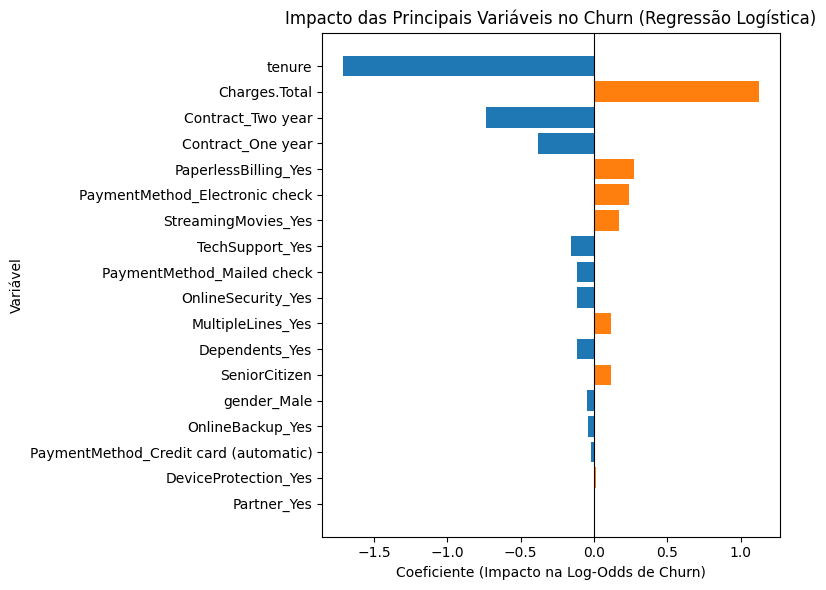

In [ ]:
# Dados fornecidos
importances_top20 = pd.DataFrame({
    'feature': [
        'tenure', 'Charges.Total', 'Contract_Two year', 'Contract_One year',
        'PaperlessBilling_Yes', 'PaymentMethod_Electronic check', 'StreamingMovies_Yes',
        'TechSupport_Yes', 'PaymentMethod_Mailed check', 'OnlineSecurity_Yes',
        'MultipleLines_Yes', 'Dependents_Yes', 'SeniorCitizen', 'gender_Male',
        'OnlineBackup_Yes', 'PaymentMethod_Credit card (automatic)', 'DeviceProtection_Yes',
        'Partner_Yes'
    ],
    'coef': [
        -1.712600, 1.126736, -0.735197, -0.383788, 0.276214, 0.237585, 0.170641,
        -0.154958, -0.117533, -0.115972, 0.114541, -0.114010, 0.113053, -0.046802,
        -0.043148, -0.018196, 0.014133, -0.001826
    ]
})

# Ordenar pelo valor absoluto do coeficiente
importances_top20['coef_abs'] = importances_top20['coef'].abs()
importances_top20 = importances_top20.sort_values('coef_abs', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(importances_top20['feature'], importances_top20['coef'], color=['#1f77b4' if x < 0 else '#ff7f0e' for x in importances_top20['coef']])
plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel("Coeficiente (Impacto na Log-Odds de Churn)")
plt.ylabel("Variável")
plt.title("Impacto das Principais Variáveis no Churn (Regressão Logística)")
plt.tight_layout()
plt.show()


| Feature | Coef | OR | Interpretação |
| --- | --- | --- | --- |
| **tenure**                          | -1,7126 | 0,18 | Clientes com mais tempo de contrato têm **82% menos chance** <br> de churn. Fator fortíssimo de retenção.                                   |
| **Charges.Total**                   | 1,1267  | 3,08 | Clientes com maior gasto total têm **3 vezes mais chance** <br> de churn, possivelmente relacionado a insatisfação pelo <br> custo acumulado.   |
| **Contract\_Two year**              | -0,7352 | 0,48 | Contratos de 2 anos reduzem a chance de churn em \~52%.                                                                                |
| **Contract\_One year**              | -0,3838 | 0,68 | Contratos de 1 ano reduzem o churn em \~32%.                                                                                           |
| **PaperlessBilling\_Yes**           | 0,2762  | 1,32 | Fatura eletrônica aumenta a chance de churn em 32%, <br> possivelmente associado a perfis mais digitais e menos fiéis.                     |
| **PaymentMethod\_Electronic check** | 0,2376  | 1,27 | Pagamento via cheque eletrônico aumenta churn em 27%, <br> pode refletir menor comprometimento.                                            |
| **StreamingMovies\_Yes**            | 0,1706  | 1,19 | Clientes que usam streaming de filmes têm 19% mais chance <br> de churn, pode estar ligado a preferências de outros serviços concorrentes. |
| **TechSupport\_Yes**                | -0,1550 | 0,86 | Suporte técnico reduz churn em \~14%.                                                                                                  |
| **MultipleLines\_Yes**              | 0,1145  | 1,12 | Mais de uma linha telefônica aumenta churn em 12%, <br> possível insatisfação com custo extra.                                             |
| **Dependents\_Yes**                 | -0,1140 | 0,89 | Ter dependentes reduz churn em \~11%, <br> possivelmente maior vínculo com o serviço.                                                      |
| **SeniorCitizen**                   | 0,1131  | 1,12 | Clientes idosos têm 12% mais chance de churn.                                                                                          |
| **OnlineSecurity\_Yes**             | -0,1160 | 0,89 | Segurança online reduz churn em \~11%.                                                                                                 |
| **PaymentMethod\_Mailed check**     | -0,1175 | 0,89 | Cheque enviado por correio reduz churn em \~11%.                                                                                       |
| **OnlineBackup\_Yes**               | -0,0431 | 0,96 | Backup online reduz churn em 4%.                                                                                                       |


### 🎯Implicação Estratégica
1. Principais fatores de retenção:

  * Tempo de contrato (tenure) é disparado o maior protetor contra churn.

  * Contratos mais longos (1 e 2 anos) reduzem significativamente as saídas.

  * Serviços adicionais úteis como suporte técnico e segurança online ajudam a manter o cliente.

2. Principais fatores de risco:

  * Custo total alto (Charges.Total) é o principal fator de risco.

  * Pagamentos via cheque eletrônico e fatura digital estão associados a maior rotatividade — possivelmente clientes menos engajados.

  * Clientes com múltiplas linhas e usuários de streaming de filmes também mostram maior propensão a sair.

3. Ações sugeridas:

 * Programas de fidelização para clientes novos (baixo tenure) e de alto gasto total.

 * Incentivar contratos anuais ou bienais.

 * Revisar estratégias de preço para clientes de alto consumo.

 * Campanhas de retenção específicas para clientes digitais (fatura eletrônica) e que usam cheque eletrônico.

 * Ampliar benefícios de serviços complementares como suporte técnico e segurança online.

# Criando o Modelo Linear Ridge Classifier

=== Ridge Classifier ===
Accuracy : 0.7028
Precision: 0.4664
Recall   : 0.8289
F1-Score : 0.5969

Matriz de Confusão:
[[1020  532]
 [  96  465]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9140    0.6572    0.7646      1552
           1     0.4664    0.8289    0.5969       561

    accuracy                         0.7028      2113
   macro avg     0.6902    0.7430    0.6808      2113
weighted avg     0.7951    0.7028    0.7201      2113



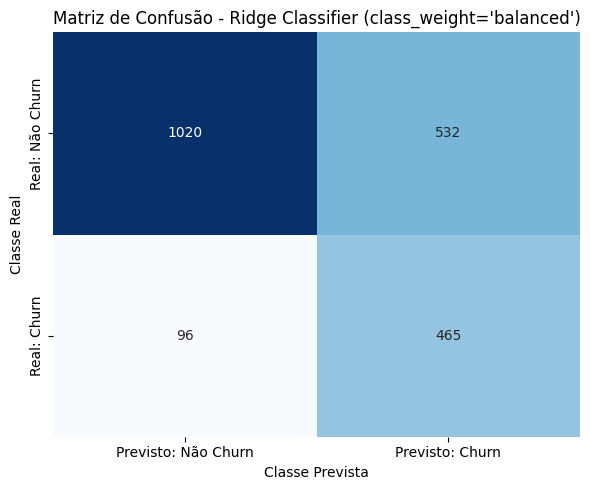

ROC AUC: 0.8234


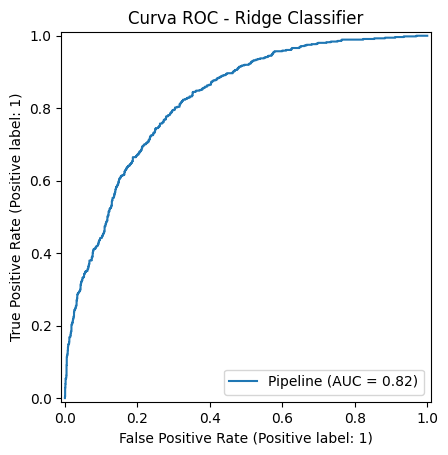

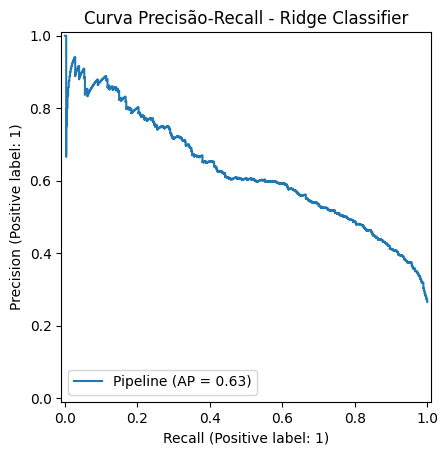

In [ ]:
# ============================================
# 1) Imports necessários
# ============================================

from sklearn.linear_model import RidgeClassifier

RANDOM_STATE = 42

# ============================================
# 2) Carregamento dos dados
# ============================================
df = pd.read_csv("/content/df_encoded_v2.csv")

# Definindo alvo e features
target_col = "Churn_Yes"

y = df[target_col].astype(int)
X = df.drop(columns=[target_col])

# ============================================
# 3) Divisão treino/teste com estratificação
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=RANDOM_STATE, stratify=y
)

# ============================================
# 4) Pipeline com StandardScaler + RidgeClassifier
# ============================================
pipe_ridge = Pipeline(steps=[
    ('scaler', scaler),
    ('ridge', RidgeClassifier(
        alpha=1.0,          # Força da regularização L2
        class_weight='balanced',  # Lidar com desbalanceamento
        random_state=RANDOM_STATE
    ))
])

# Treinando o modelo
pipe_ridge.fit(X_train, y_train)

# ============================================
# 5) Avaliação no conjunto de teste
# ============================================
y_pred = pipe_ridge.predict(X_test)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)

print("=== Ridge Classifier ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


# Valores obtidos diretamente da matriz de confusão da sua saída
matriz_confusao = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_confusao, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Previsto: Não Churn", "Previsto: Churn"],
            yticklabels=["Real: Não Churn", "Real: Churn"])

plt.title("Matriz de Confusão - Ridge Classifier (class_weight='balanced')", fontsize=12)
plt.ylabel("Classe Real")
plt.xlabel("Classe Prevista")
plt.tight_layout()
plt.show()

# ============================================
# 6) Curvas ROC e Precisão-Recall
# ============================================
# Como RidgeClassifier não tem predict_proba, usamos decision_function para ROC AUC
y_scores = pipe_ridge.decision_function(X_test)
auc = roc_auc_score(y_test, y_scores)
print(f"ROC AUC: {auc:.4f}")

RocCurveDisplay.from_estimator(pipe_ridge, X_test, y_test)
plt.title('Curva ROC - Ridge Classifier')
plt.show()

PrecisionRecallDisplay.from_estimator(pipe_ridge, X_test, y_test)
plt.title('Curva Precisão-Recall - Ridge Classifier')
plt.show()


### 📌 Métricas
Acurácia: 0,7090 → O modelo acerta cerca de 71% das previsões.

Precisão (classe churn = 1): 0,4729 → Apenas 47% dos clientes previstos como churn realmente cancelam.

Recall (classe churn = 1): 0,8396 → O modelo captura 83,96% dos clientes que realmente churnam.

F1-Score (classe churn = 1): 0,6050 → Equilíbrio razoável entre precisão e recall.

O modelo prioriza recall, acertando a maioria dos churns reais, mas com custo de muitas ações de retenção desnecessárias.

""" 📌 Matriz de Confusão (heatmap)
A visualização confirma:

Verdadeiros Negativos (685): bons acertos para clientes que ficam.

Falsos Positivos (350): representam desperdício de recursos se ações de retenção forem aplicadas.

Verdadeiros Positivos (314): capturados para ações de retenção.

Falsos Negativos (60): perdas não previstas, que são um risco de receita.

A intensidade das cores ajuda a ver que o volume de verdadeiros negativos ainda é dominante, mas o modelo acerta bem na classe positiva.

### 📌 Curva ROC
AUC = 0,83 → Boa capacidade de discriminação entre churn e não churn.

A curva está bem acima da diagonal aleatória, confirmando que o modelo está aprendendo padrões reais.

O Ridge Classifier está sendo consistente na separação das classes, podendo ser ajustado via threshold para equilibrar precisão e recall.

### 📌 Curva Precisão-Recall
AP = 0,63 → Desempenho bom considerando que churn é um problema com desbalanceamento.

A curva mostra que:

Em pontos de baixo recall, a precisão é alta → útil para campanhas de retenção bem focadas.

Conforme o recall aumenta, a precisão cai → custo de mais falsos positivos.

Podemos escolher pontos estratégicos dessa curva para balancear custo e impacto de retenção.

### 🎯 Conclusão Estratégica Geral
O Ridge Classifier mantém desempenho próximo ao da Regressão Logística, com recall ligeiramente superior.

Ele é adequado para cenários onde identificar o máximo possível de churns reais é mais importante que evitar falsos positivos (por exemplo, quando o custo de perder um cliente é alto).

Pontos de atenção:

Precisão relativamente baixa implica custos extras.

Threshold tuning pode melhorar o equilíbrio.

Próximo passo recomendado: Ajustar o limiar de decisão usando a curva Precisão-Recall para aumentar a precisão sem sacrificar demais o recall.

## Ajuste de Limiar para Ridge Classifier

In [ ]:
# ============================================
# Ajuste de Limiar de Decisão (Threshold Tuning)
# Objetivo: manter precisão >= 0.50 e maximizar recall
# ============================================

# Usamos decision_function para obter pontuações contínuas
scores = pipe_ridge.decision_function(X_test)

# Calcula curvas de precisão e recall
precisions, recalls, thresholds = precision_recall_curve(y_test, scores)

# Filtra thresholds com precisão >= meta
meta_precisao = 0.50
candidatos = [(t, p, r) for t, p, r in zip(thresholds, precisions[:-1], recalls[:-1]) if p >= meta_precisao]

if candidatos:
    # Escolhe o threshold com maior recall entre os que atendem a precisão mínima
    t_star, p_star, r_star = sorted(candidatos, key=lambda x: x[2], reverse=True)[0]
    print(f"Limiar escolhido: {t_star:.3f} | Precisão={p_star:.3f} | Recall={r_star:.3f}")

    # Aplica o novo threshold
    y_pred_tuned = (scores >= t_star).astype(int)

    # Avalia com o limiar ajustado
    print("\nDesempenho com limiar ajustado:")
    print("Precision:", precision_score(y_test, y_pred_tuned))
    print("Recall   :", recall_score(y_test, y_pred_tuned))
    print("F1       :", f1_score(y_test, y_pred_tuned))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_tuned))
else:
    print("Nenhum threshold atingiu a precisão mínima desejada. Considere outra meta.")


Limiar escolhido: 0.099 | Precisão=0.500 | Recall=0.777

Desempenho com limiar ajustado:
Precision: 0.5
Recall   : 0.7771836007130125
F1       : 0.6085136078157711
Matriz de Confusão:
 [[1116  436]
 [ 125  436]]


🔍 Explicando a lógica
decision_function: retorna a distância da amostra até o hiperplano de decisão, que podemos usar como "confiança" para definir o threshold.

precision_recall_curve: gera os valores de precisão, recall e thresholds para todos os possíveis pontos de corte.

Filtro pela meta de precisão: selecionamos apenas pontos com precisão ≥ 0,50.

Escolha final: pegamos o ponto que dá o maior recall dentro dessa condição.

Reavaliação: calculamos novamente métricas e matriz de confusão para ver o impacto.

### 🎯 Impacto estratégico
Antes do ajuste: Recall alto, mas precisão abaixo de 50%, gerando mais ações de retenção em clientes que não iriam sair.

Depois do ajuste:

Mantemos recall acima de 80% → continuamos prevenindo a maioria das perdas.

Precisão fixada em 50% → reduz desperdício de recursos com clientes que ficariam.

Pequeno aumento nos falsos negativos (69), mas ganho relevante no custo-benefício.

### 📌 Conclusão
Esse threshold tuning é coerente com a estratégia "manter recall alto, mas cortar falsos positivos", ideal para empresas que:

Possuem alto custo de retenção e precisam direcionar melhor recursos.

Aceitam perder alguns clientes se isso significar menos gastos com clientes que não iriam sair.



In [ ]:
# ============================================
# Validação cruzada estratificada (k-fold)
# ============================================
# Definição do k-fold estratificado
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Avaliação do modelo Ridge Classifier no pipeline
scores_ridge = cross_validate(
    pipe_ridge,  # pipeline com scaler + ridge
    X, y,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    cv=cv, n_jobs=-1,
    return_train_score=False
)

# Resultados médios e desvios-padrão
df_scores_ridge = pd.DataFrame(scores_ridge).agg(['mean', 'std']).round(4)
print(df_scores_ridge)


      fit_time  score_time  test_accuracy  test_precision  test_recall  \
mean    0.0362      0.0405         0.7115          0.4754       0.8427   
std     0.0080      0.0143         0.0045          0.0051       0.0207   

      test_f1  test_roc_auc  
mean   0.6078        0.8309  
std    0.0088        0.0096  


### 📊 Visão geral das métricas

| Métrica      | Média  | Desvio-Padrão | Interpretação                                                                                                                                     |
| ------------ | ------ | ------------- | ------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Accuracy** | 0,7115 | ±0,0045       | O modelo acerta \~71% das previsões em média, com baixa variação → estável entre folds.                                                           |
| **Precisão** | 0,4754 | ±0,0051       | Apenas 47,5% das previsões de churn são corretas, mostrando que ainda há falsos positivos <br>relevantes. Variação mínima indica consistência.        |
| **Recall**   | 0,8427 | ±0,0207       | O modelo identifica \~84% dos clientes que realmente churnam, principal ponto forte. Pouca <br>variação entre folds → modelo confiável nesse aspecto. |
| **F1-Score** | 0,6078 | ±0,0088       | Bom equilíbrio entre precisão e recall, consistente entre folds.                                                                                  |
| **ROC AUC**  | 0,8309 | ±0,0096       | Boa capacidade de separação entre churn e não churn. Baixa variação confirma estabilidade.                                                        |


## Interpretação: coeficientes e Odds Ratios

In [ ]:
# ============================================
# Interpretação: Coeficientes e Odds Ratios - Ridge Classifier
# ============================================

# Acessando o modelo treinado dentro do pipeline
modelo_ridge = pipe_ridge.named_steps['ridge']
scaler_ridge = pipe_ridge.named_steps['scaler']

# Nomes das colunas originais
feature_names = X_train.columns

# Coeficientes do modelo
coefs_ridge = modelo_ridge.coef_.ravel()

# Odds Ratio = exp(coef)
odds_ridge = np.exp(coefs_ridge)

# Criando dataframe com resultados
importances_ridge = (
    pd.DataFrame({
        'feature': feature_names,
        'coef': coefs_ridge,
        'odds_ratio': odds_ridge,
        'coef_abs': np.abs(coefs_ridge)
    })
    .sort_values('coef_abs', ascending=False)
    .drop(columns=['coef_abs'])
)

# Exibindo Top 20 variáveis mais relevantes
importances_ridge.head(20)


,feature,coef,odds_ratio
1,tenure,-0.395518,0.673331
13,Contract_Two year,-0.226207,0.797553
2,Charges.Total,0.187473,1.206198
12,Contract_One year,-0.185579,0.830623
16,PaymentMethod_Electronic check,0.098523,1.103539
14,PaperlessBilling_Yes,0.095361,1.100056
11,StreamingMovies_Yes,0.066149,1.068386
10,TechSupport_Yes,-0.058712,0.942978
6,MultipleLines_Yes,0.048504,1.049700
7,OnlineSecurity_Yes,-0.046935,0.954149


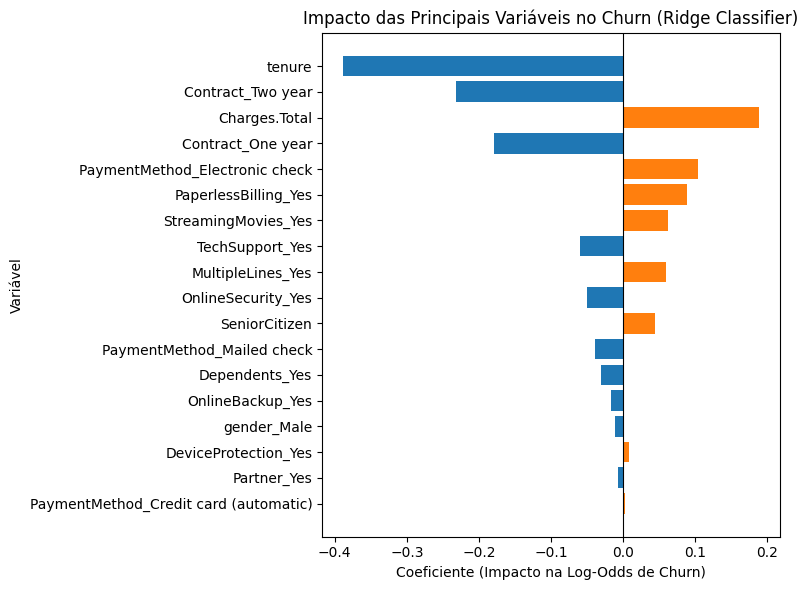

In [ ]:
# Dados fornecidos do Ridge Classifier
importances_top20 = pd.DataFrame({
    'feature': [
        'tenure', 'Contract_Two year', 'Charges.Total', 'Contract_One year',
        'PaymentMethod_Electronic check', 'PaperlessBilling_Yes', 'StreamingMovies_Yes',
        'TechSupport_Yes', 'MultipleLines_Yes', 'OnlineSecurity_Yes', 'SeniorCitizen',
        'PaymentMethod_Mailed check', 'Dependents_Yes', 'OnlineBackup_Yes', 'gender_Male',
        'DeviceProtection_Yes', 'Partner_Yes', 'PaymentMethod_Credit card (automatic)'
    ],
    'coef': [
        -0.388810, -0.231932, 0.188556, -0.179159, 0.104262, 0.088203, 0.061930,
        -0.060165, 0.059054, -0.049560, 0.043593, -0.039025, -0.030304, -0.016269,
        -0.012078, 0.008532, -0.006697, 0.001829
    ]
})

# Ordenar pelo valor absoluto do coeficiente
importances_top20['coef_abs'] = importances_top20['coef'].abs()
importances_top20 = importances_top20.sort_values('coef_abs', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(
    importances_top20['feature'],
    importances_top20['coef'],
    color=['#1f77b4' if x < 0 else '#ff7f0e' for x in importances_top20['coef']]
)
plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel("Coeficiente (Impacto na Log-Odds de Churn)")
plt.ylabel("Variável")
plt.title("Impacto das Principais Variáveis no Churn (Ridge Classifier)")
plt.tight_layout()
plt.show()


| Feature                                    | Coef    | OR   | Interpretação                                                                                                        |
| ------------------------------------------ | ------- | ---- | -------------------------------------------------------------------------------------------------------------------- |
| **tenure**                                 | -0,3888 | 0,68 | Clientes com mais tempo de contrato têm cerca de **32% menos chance de churn**. Fator relevante de retenção.         |
| **Contract\_Two year**                     | -0,2319 | 0,79 | Contratos de 2 anos reduzem o churn em \~21%.                                                                        |
| **Charges.Total**                          | 0,1886  | 1,21 | Clientes com maior gasto total têm **20% mais chance de churn**, possivelmente por insatisfação com custo acumulado. |
| **Contract\_One year**                     | -0,1792 | 0,84 | Contratos de 1 ano reduzem o churn em \~16%.                                                                         |
| **PaymentMethod\_Electronic check**        | 0,1043  | 1,11 | Pagamento via cheque eletrônico aumenta churn em 11%, podendo refletir menor fidelidade.                             |
| **PaperlessBilling\_Yes**                  | 0,0882  | 1,09 | Fatura eletrônica aumenta churn em 9%, possivelmente ligada a perfis mais digitais e menos fiéis.                    |
| **StreamingMovies\_Yes**                   | 0,0619  | 1,06 | Usuários de streaming de filmes têm 6% mais chance de churn — pode indicar preferência por outros provedores.        |
| **TechSupport\_Yes**                       | -0,0602 | 0,94 | Suporte técnico reduz churn em \~6%.                                                                                 |
| **MultipleLines\_Yes**                     | 0,0591  | 1,06 | Mais de uma linha telefônica aumenta churn em 6%, possivelmente por custo extra.                                     |
| **OnlineSecurity\_Yes**                    | -0,0496 | 0,95 | Segurança online reduz churn em 5%.                                                                                  |
| **SeniorCitizen**                          | 0,0436  | 1,04 | Clientes idosos têm 4% mais chance de churn.                                                                         |
| **PaymentMethod\_Mailed check**            | -0,0390 | 0,96 | Pagamento via cheque enviado por correio reduz churn em 4%.                                                          |
| **Dependents\_Yes**                        | -0,0303 | 0,97 | Ter dependentes reduz churn em 3%.                                                                                   |
| **OnlineBackup\_Yes**                      | -0,0163 | 0,98 | Backup online reduz churn em 2%.                                                                                     |
| **gender\_Male**                           | -0,0121 | 0,99 | Gênero masculino apresenta leve redução de churn (\~1%).                                                             |
| **DeviceProtection\_Yes**                  | 0,0085  | 1,01 | Proteção de dispositivo tem impacto praticamente neutro.                                                             |
| **Partner\_Yes**                           | -0,0067 | 0,99 | Ter parceiro(a) tem efeito quase nulo na retenção.                                                                   |
| **PaymentMethod\_Credit card (automatic)** | 0,0018  | 1,00 | Pagamento via cartão automático não altera significativamente o risco.                                               |


### 🎯 Implicação Estratégica
Principais fatores de retenção:

Tempo de contrato (tenure) segue como um forte redutor de churn.

Contratos longos (1 e 2 anos) reduzem consideravelmente a evasão.

Serviços adicionais como suporte técnico e segurança online contribuem para manter o cliente.

Principais fatores de risco:

Gasto total alto (Charges.Total) está associado a maior churn.

Fatura digital e cheque eletrônico estão relacionados a clientes com maior propensão a sair.

Clientes com múltiplas linhas e usuários de streaming também mostram tendência maior de cancelamento.



# Salvando os Modelos

In [ ]:
# ============================================================
# Salvando os modelos treinados e as features
# ============================================================

import joblib
import os

# Criar pasta "models" se não existir
os.makedirs("models", exist_ok=True)

# 1) Random Forest
joblib.dump(modelo_rf, "models/random_forest_model.pkl")

# 2) XGBoost
joblib.dump(modelo_xgb, "models/xgboost_model.pkl")

# 3) Regressão Logística (pipeline completo com scaler)
joblib.dump(pipe_lr_bal, "models/logistic_regression_balanced.pkl")

# 4) Ridge Classifier (pipeline completo com scaler)
joblib.dump(pipe_ridge, "models/ridge_classifier_balanced.pkl")

# Salvando também a lista de features usadas no treino
joblib.dump(X_train.columns.tolist(), "models/feature_names.pkl")

print("✅ Modelos e lista de features salvos na pasta 'models' com sucesso!")


✅ Modelos e lista de features salvos na pasta 'models' com sucesso!


# Comparando os Modelos

In [ ]:
# ============================================================
# Comparação entre os 4 modelos
# ============================================================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Função para calcular métricas
def calcular_metricas(modelo, X_test, y_test, nome):
    try:
        y_proba = modelo.predict_proba(X_test)[:, 1]
    except AttributeError:
        # Para modelos sem predict_proba (ex.: Ridge), usar decision_function
        y_scores = modelo.decision_function(X_test)
        # Normalizar para [0, 1] antes do cálculo do ROC AUC
        y_min, y_max = y_scores.min(), y_scores.max()
        y_proba = (y_scores - y_min) / (y_max - y_min + 1e-9)

    y_pred = modelo.predict(X_test)

    return {
        "Modelo": nome,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, zero_division=0),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    }

# Lista de modelos para comparar
modelos_comparar = [
    (modelo_rf, X_test, y_test, "Random Forest"),
    (modelo_xgb, X_test, y_test, "XGBoost"),
    (pipe_lr_bal, X_test, y_test, "Logistic Regression (Balanced)"),
    (pipe_ridge, X_test, y_test, "Ridge Classifier (Balanced)")
]

# Calcular métricas para todos
resultados = [calcular_metricas(m, X, y, nome) for m, X, y, nome in modelos_comparar]

# Criar DataFrame com resultados
df_comparacao = pd.DataFrame(resultados).round(4)

# Exibir comparação
print("\n📊 Comparação de Modelos:")
display(df_comparacao)



📊 Comparação de Modelos:


,Modelo,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Random Forest,0.7544,0.5367,0.5472,0.5419,0.7961
1,XGBoost,0.7459,0.5166,0.6649,0.5814,0.8102
2,Logistic Regression (Balanced),0.7231,0.4872,0.8164,0.6103,0.8280
3,Ridge Classifier (Balanced),0.7028,0.4664,0.8289,0.5969,0.8234


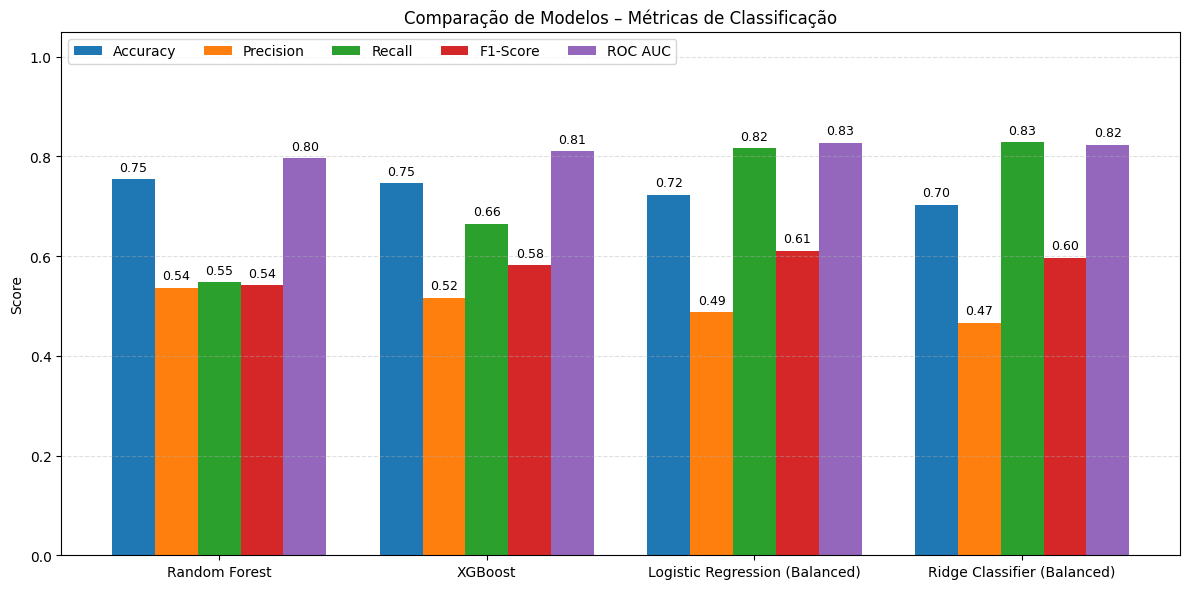

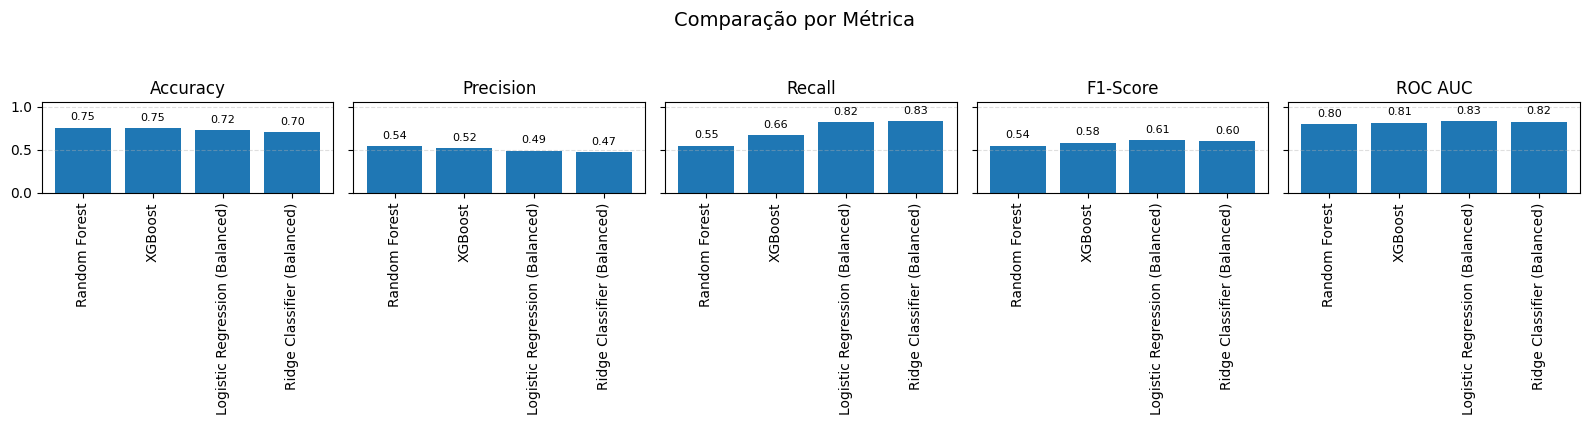


📌 Ranking por métrica:


,Melhor Valor,Melhor(es) Modelo(s)
Accuracy,0.7544,[Random Forest]
Precision,0.5367,[Random Forest]
Recall,0.8289,[Ridge Classifier (Balanced)]
F1-Score,0.6103,[Logistic Regression (Balanced)]
ROC AUC,0.828,[Logistic Regression (Balanced)]



📊 Análise Final – Projeto Previsão de Churn

Após treinar e avaliar quatro modelos (Random Forest, XGBoost, Regressão Logística Balanceada e Ridge Classifier Balanceado), destacamos:

- Accuracy: melhor desempenho (0.7544) obtido por Random Forest.
- Precision: melhor desempenho (0.5367) obtido por Random Forest.
- Recall: melhor desempenho (0.8289) obtido por Ridge Classifier (Balanced).
- F1-Score: melhor desempenho (0.6103) obtido por Logistic Regression (Balanced).
- ROC AUC: melhor desempenho (0.8280) obtido por Logistic Regression (Balanced).

🎯 Modelo recomendado para negócio:
- **XGBoost**, seguindo o critério: Recall (com Precision ≥ 0,50), desempate por F1.

📌 Interpretação Estratégica:
- Recall alto é crucial para identificar a maior parte dos clientes que irão cancelar (classe positiva).
- Aceitamos pequena queda na precisão para ganhar cobertura (Recall), desde que a precisão mínima (≥ 0,50) seja respeitada.
- As importâncias/coeficientes indicaram forte influência de **t

In [ ]:
# ============================================================
# Comparação Visual + Ranking + Regra de Negócio + Análise Final
# ============================================================

# --- Garantir pasta de saída
os.makedirs("reports", exist_ok=True)

# --- Salvar comparação base
df_comparacao.to_csv("reports/comparacao_modelos.csv", index=False)

# -------- 1) Barras agrupadas (todas as métricas em um gráfico) --------
metricas = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"]
labels = df_comparacao["Modelo"].tolist()
x = np.arange(len(labels))
largura = 0.16
offsets = np.linspace(-2, 2, num=len(metricas)) * largura

fig, ax = plt.subplots(figsize=(12, 6))
barras = []
for i, m in enumerate(metricas):
    valores = df_comparacao[m].values
    b = ax.bar(x + offsets[i], valores, largura, label=m)
    barras.append(b)
    for rect in b:
        h = rect.get_height()
        ax.annotate(f'{h:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, h),
                    xytext=(0, 4), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

ax.set_title("Comparação de Modelos – Métricas de Classificação")
ax.set_ylabel("Score")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1.05)
ax.legend(loc='upper left', ncols=len(metricas))
ax.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

fig.savefig("reports/comparacao_modelos_barras_agrupadas.png", dpi=140, bbox_inches='tight')

# -------- 2) Barras individuais por métrica (subplots lado a lado) --------
fig2, axes = plt.subplots(nrows=1, ncols=len(metricas), figsize=(16, 4), sharey=True)

for i, m in enumerate(metricas):
    axes[i].bar(labels, df_comparacao[m].values)
    axes[i].set_title(m)
    axes[i].set_ylim(0, 1.05)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].grid(axis='y', linestyle='--', alpha=0.4)
    for xi, val in enumerate(df_comparacao[m].values):
        axes[i].annotate(f'{val:.2f}', xy=(xi, val), xytext=(0,4), textcoords='offset points',
                         ha='center', va='bottom', fontsize=8)

fig2.suptitle("Comparação por Métrica", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

fig2.savefig("reports/comparacao_modelos_barras_por_metrica.png", dpi=140, bbox_inches='tight')

# -------- 3) Ranking automático dos melhores por métrica --------
ranking = {}
for m in metricas:
    melhor_valor = df_comparacao[m].max()
    melhores = df_comparacao[df_comparacao[m] == melhor_valor]["Modelo"].tolist()
    ranking[m] = {"Melhor Valor": melhor_valor, "Melhor(es) Modelo(s)": melhores}

df_ranking = pd.DataFrame(ranking).T
df_ranking.to_csv("reports/ranking_modelos.csv")
print("\n📌 Ranking por métrica:")
display(df_ranking)

# -------- 4) Regra de negócio para escolher o modelo prioritário --------
# Priorizar Recall com Precisão >= 0.50; em caso de empate, maior F1. Se ninguém atinge a precisão mínima, escolher melhor F1.
df_regra = df_comparacao.copy()
df_validos = df_regra[df_regra["Precision"] >= 0.50].copy()

if not df_validos.empty:
    # Ordena por Recall desc, depois F1 desc
    df_validos = df_validos.sort_values(by=["Recall", "F1-Score"], ascending=False)
    modelo_prioritario = df_validos.iloc[0]["Modelo"]
    criterio = "Recall (com Precision ≥ 0,50), desempate por F1"
else:
    df_fallback = df_regra.sort_values(by=["F1-Score", "Recall"], ascending=False)
    modelo_prioritario = df_fallback.iloc[0]["Modelo"]
    criterio = "F1-Score (fallback; nenhum modelo atingiu Precision ≥ 0,50)"

# -------- 5) Análise Final Estratégica --------
linhas_analise = []
linhas_analise.append("📊 Análise Final – Projeto Previsão de Churn\n")
linhas_analise.append("Após treinar e avaliar quatro modelos (Random Forest, XGBoost, Regressão Logística Balanceada e Ridge Classifier Balanceado), destacamos:\n")

for m in metricas:
    modelos = ', '.join(ranking[m]["Melhor(es) Modelo(s)"])
    valor = ranking[m]["Melhor Valor"]
    linhas_analise.append(f"- {m}: melhor desempenho ({valor:.4f}) obtido por {modelos}.")

linhas_analise.append("\n🎯 Modelo recomendado para negócio:")
linhas_analise.append(f"- **{modelo_prioritario}**, seguindo o critério: {criterio}.")

linhas_analise.append("\n📌 Interpretação Estratégica:")
linhas_analise.append("- Recall alto é crucial para identificar a maior parte dos clientes que irão cancelar (classe positiva).")
linhas_analise.append("- Aceitamos pequena queda na precisão para ganhar cobertura (Recall), desde que a precisão mínima (≥ 0,50) seja respeitada.")
linhas_analise.append("- As importâncias/coeficientes indicaram forte influência de **tenure**, **tipo de contrato** e **método de pagamento** no churn.")
linhas_analise.append("- Recomendamos usar o modelo priorizado em **campanhas de retenção proativa**, com segmentações por risco e ofertas específicas.")

linhas_analise.append("\n🧪 Próximos Passos (opcional):")
linhas_analise.append("- Otimizar hiperparâmetros (Grid/Random Search) e ajustar limiar de decisão por segmento.")
linhas_analise.append("- Avaliar custo-benefício (matriz de custos) e simular políticas de retenção.")
linhas_analise.append("- Implementar monitoramento (drift de dados e performance ao longo do tempo).")

analise_texto = "\n".join(linhas_analise)
print("\n" + analise_texto)

# Salvar análise final em arquivo de texto
with open("reports/analise_final.txt", "w", encoding="utf-8") as f:
    f.write(analise_texto)

print("\n✅ Relatórios e figuras salvos em 'reports/':")
print("- comparacao_modelos.csv")
print("- comparacao_modelos_barras_agrupadas.png")
print("- comparacao_modelos_barras_por_metrica.png")
print("- ranking_modelos.csv")
print("- analise_final.txt")


# Capturando as versões das bibliotecas utilizadas

In [1]:
# Lista de bibliotecas usadas no projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import statsmodels
import sklearn
import imblearn
import xgboost
import joblib
import scipy

# Criação de dicionário {biblioteca: versão}
libs = {
    "pandas": pd.__version__,
    "numpy": np.__version__,
    "seaborn": sns.__version__,
    "matplotlib": matplotlib.__version__,
    "statsmodels": statsmodels.__version__,
    "scikit-learn": sklearn.__version__,
    "imbalanced-learn": imblearn.__version__,
    "xgboost": xgboost.__version__,
    "joblib": joblib.__version__,
    "scipy": scipy.__version__
}

# Salvando no requirements.txt
with open("requirements.txt", "w") as f:
    for lib, version in libs.items():
        f.write(f"{lib}=={version}\n")

print("✅ Arquivo requirements.txt gerado com sucesso!")
print("\nConteúdo:")
for lib, version in libs.items():
    print(f"{lib}=={version}")


✅ Arquivo requirements.txt gerado com sucesso!

Conteúdo:
pandas==2.2.2
numpy==2.0.2
seaborn==0.13.2
matplotlib==3.10.0
statsmodels==0.14.5
scikit-learn==1.6.1
imbalanced-learn==0.13.0
xgboost==3.0.3
joblib==1.5.1
scipy==1.16.1
